# MongoDB Movies Sample Dashboard Report
## 055028 Oishik Banerjee
## Data Analysis & Managerial Insights
This report provides detailed queries and insights for analyzing the `sample_mflix.movies` collection in MongoDB Atlas.

**Dataset:** `sample_mflix.movies`

---

# Data Description of `sample_mflix.movies` Collection in MongoDB Atlas

The `sample_mflix.movies` collection is part of the sample datasets provided by MongoDB Atlas. This collection contains detailed information about movies, including metadata like title, genres, release year, cast, and more. Below is a structured description of the fields in this collection.

---

## **Collection Overview**
- **Database**: `sample_mflix`
- **Collection**: `movies`
- **Number of Documents**: Over 23,000 movie records
- **Purpose**: To provide a dataset for learning and testing MongoDB queries, aggregations, and full-text search.

---

## **Field Descriptions**

| **Field Name**          | **Type**           | **Description**                                                                 |
|--------------------------|--------------------|---------------------------------------------------------------------------------|
| `_id`                   | `ObjectId`         | Unique identifier for each document.                                           |
| `title`                 | `String`           | Title of the movie.                                                            |
| `plot`                  | `String`           | Short description or synopsis of the movie's plot.                             |
| `genres`                | `Array<String>`    | List of genres associated with the movie (e.g., Action, Drama).                |
| `runtime`               | `Number`           | Duration of the movie in minutes.                                              |
| `cast`                  | `Array<String>`    | List of actors who starred in the movie.                                       |
| `num_mflix_comments`    | `Number`           | Number of comments on the movie in the Mflix application.                      |
| `countries`             | `Array<String>`    | Countries where the movie was produced.                                        |
| `released`              | `Date`             | Release date of the movie.                                                     |
| `directors`             | `Array<String>`    | List of directors who worked on the movie.                                     |
| `rated`                 | `String`           | Movie rating (e.g., PG, PG-13).                                                |
| `awards`                | `Object`           | Details about awards won by the movie:                                         |
|                          | - `wins`: Number   | Total number of awards won by the movie.                                       |
|                          | - `nominations`: Number  | Total number of award nominations received.                                    |
|                          | - `text`: String   | Summary text for awards (e.g., "Won 3 Oscars").                                |
| `lastupdated`           | `String`           | Timestamp indicating when the document was last updated.                       |
| `year`                  | `Number`           | Year when the movie was released.                                              |
| `imdb`                  | `Object`           | IMDb-related data:                                                             |
|                          |- `rating`: Number  | IMDb rating of the movie (e.g., 7.8).                                          |
|                          |- `votes`: Number   | Number of votes received on IMDb.                                              |
|                          |- `id`: Number      | IMDb ID for the movie.                                                         |
| `type`                  | `String`           | Type of media (e.g., "movie").                                                 |
| `tomatoes`              | `Object`           | Data related to Rotten Tomatoes reviews:                                       |
|                          |- Viewer: Object    |- Contains viewer ratings and reviews:                                          |
|                          |- rating: Number    |- Average viewer rating on Rotten Tomatoes.                                     |
|                          |- numReviews: Number|- Total number of reviews by viewers.                                          |
|                          |- meter: Number     |- Rotten Tomatoes score as a percentage (e.g., 85).                            |

---

## **Key Features**
1. **Rich Metadata**:
   - Includes fields like genres, cast, directors, and countries to allow for diverse queries.
2. **Nested Objects**:
   - Fields like IMDb and awards contain nested objects for detailed information.
3. **Support for Aggregations**:
   - Fields like runtime, year, and ratings are numeric, making them ideal for statistical analysis.
4. **Text Search Ready**:
   - Fields like title and plot are perfect for implementing full-text search.

---





# **MongoDB Movies Analysis Report**

## **1. Connecting to MongoDB Atlas in Google Colab**
```python
use sample_mflix;
db.createCollection("movies");
```

---

## **2. Inserting Multiple Documents**
### **Problem Statement:**
The company wants to add multiple new movies to the database in one operation.

#### **Query:**
```python
db.movies.insertMany([
  {
    "title": "The Matrix",
    "year": 1999,
    "genres": ["Action", "Sci-Fi"],
    "imdb": {"rating": 8.7, "votes": 1700000},
    "rated": "R",
    "director": "Lana Wachowski, Lilly Wachowski"
  },
  {
    "title": "The Dark Knight",
    "year": 2008,
    "genres": ["Action", "Crime", "Drama"],
    "imdb": {"rating": 9.0, "votes": 2300000},
    "rated": "PG-13",
    "director": "Christopher Nolan"
  },
  {
    "title": "Interstellar",
    "year": 2014,
    "genres": ["Adventure", "Drama", "Sci-Fi"],
    "imdb": {"rating": 8.6, "votes": 1600000},
    "rated": "PG-13",
    "director": "Christopher Nolan"
  },
  {
    "title": "Gladiator",
    "year": 2000,
    "genres": ["Action", "Drama"],
    "imdb": {"rating": 8.5, "votes": 1400000},
    "rated": "R",
    "director": "Ridley Scott"
  },
  {
    "title": "Avatar",
    "year": 2009,
    "genres": ["Action", "Adventure", "Sci-Fi"],
    "imdb": {"rating": 7.8, "votes": 1200000},
    "rated": "PG-13",
    "director": "James Cameron"
  }
]);

```

### **Insight:**
- Batch insertion saves time and reduces manual effort.

---

Saving Screenshot 2025-03-16 002132.png to Screenshot 2025-03-16 002132 (3).png


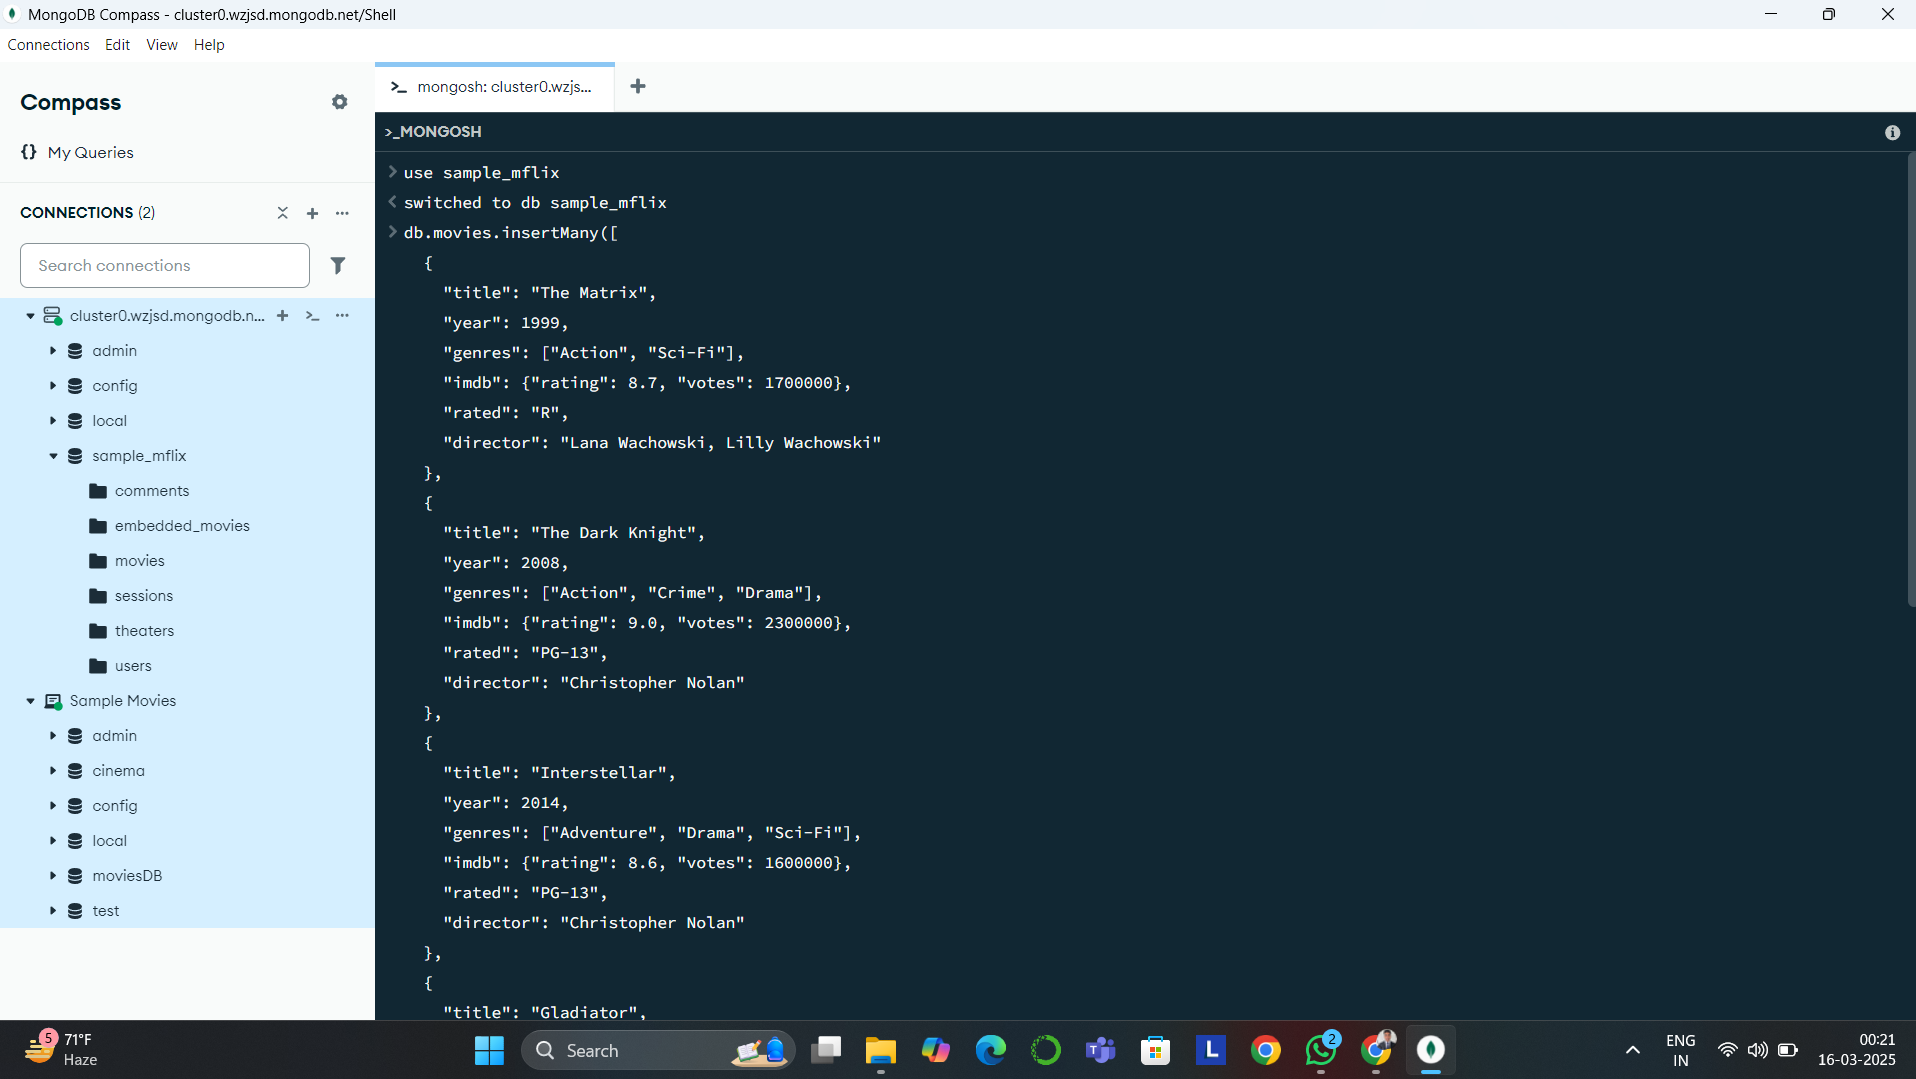

In [4]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 002132.png')


## **3. Finding a Movie by Title**
### **Problem Statement:**
Retrieve details of a specific movie by title.

#### **Query:**
```python
db.movies.find({"title": "The Matrix"});
```
### **Insight:**
- Quick retrieval of a specific movie's details.

---

Saving Screenshot 2025-03-16 120606.png to Screenshot 2025-03-16 120606.png


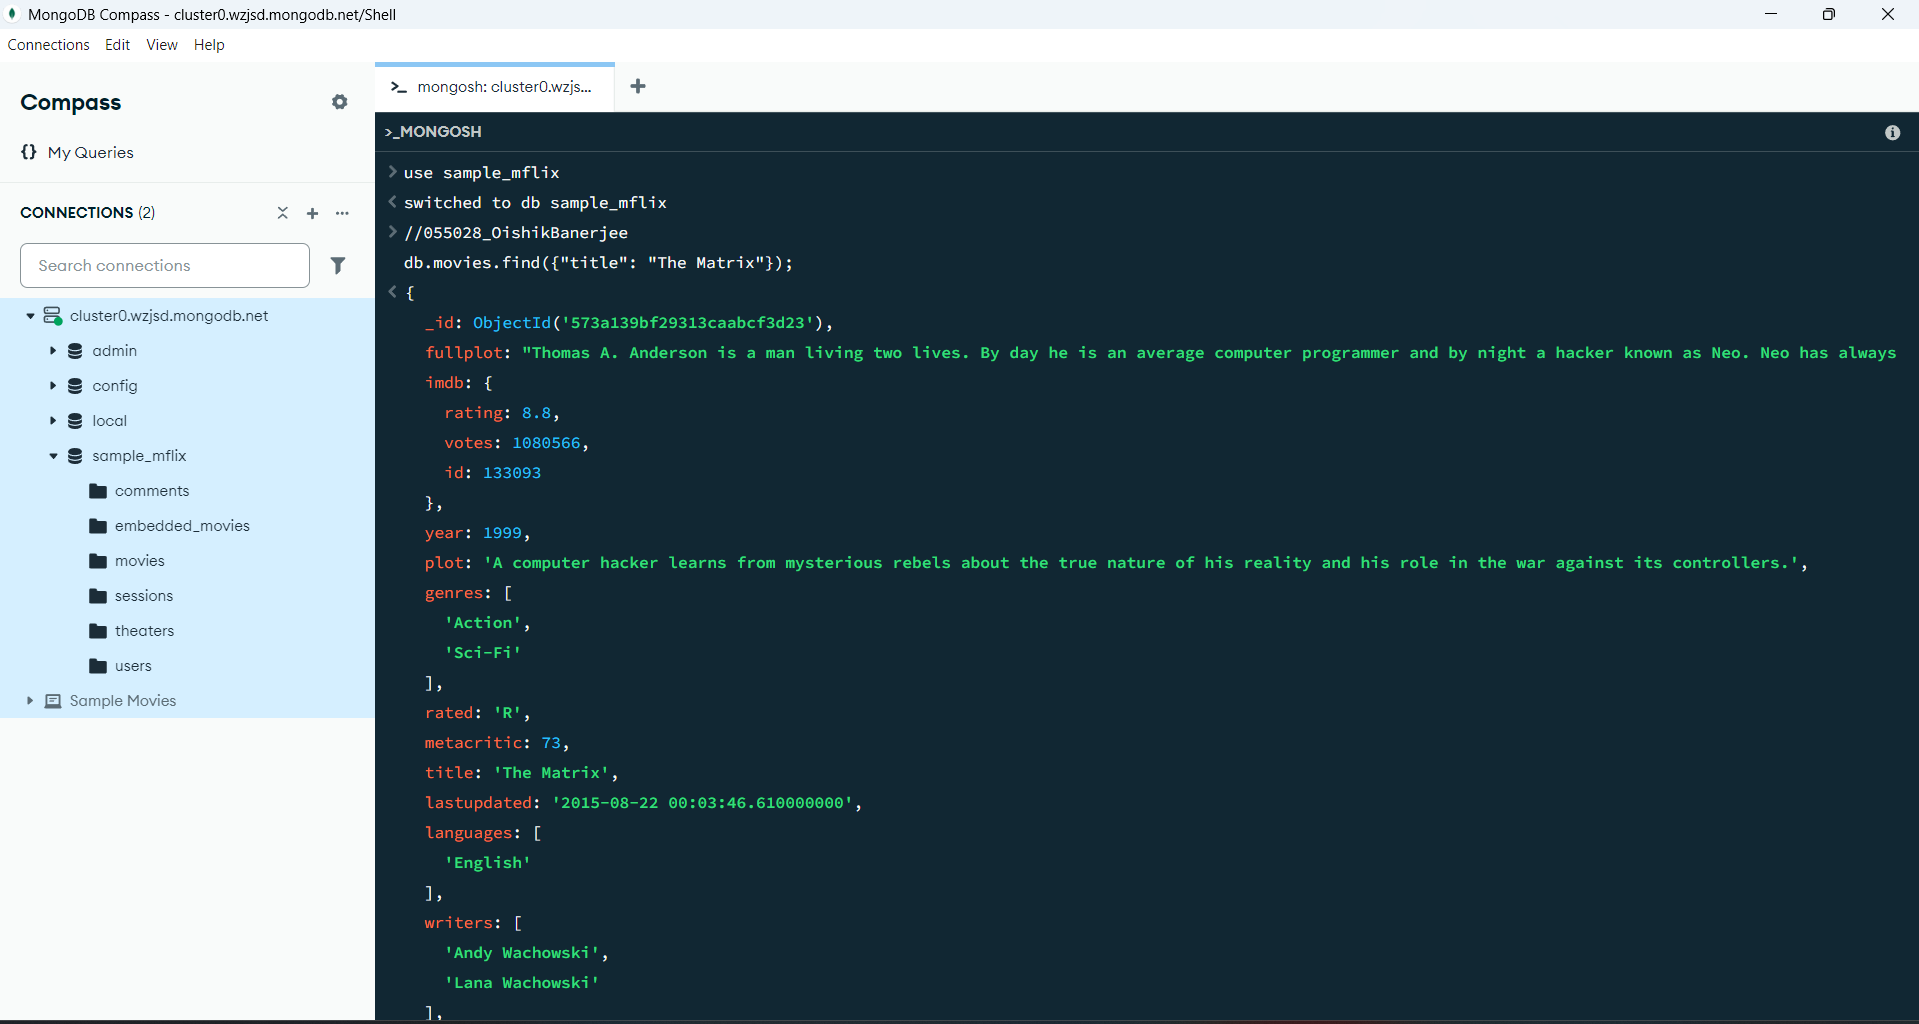

In [5]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 120606.png')

## **4. Finding Movies Released After 2000**
### **Problem Statement:**
Find all movies released after 2000.

#### **Query:**
```python
db.movies.find({"year": {$gt: 2000}});

```
### **Insight:**
- Identifies modern movies for trend analysis.

---


Saving Screenshot 2025-03-16 121000.png to Screenshot 2025-03-16 121000.png


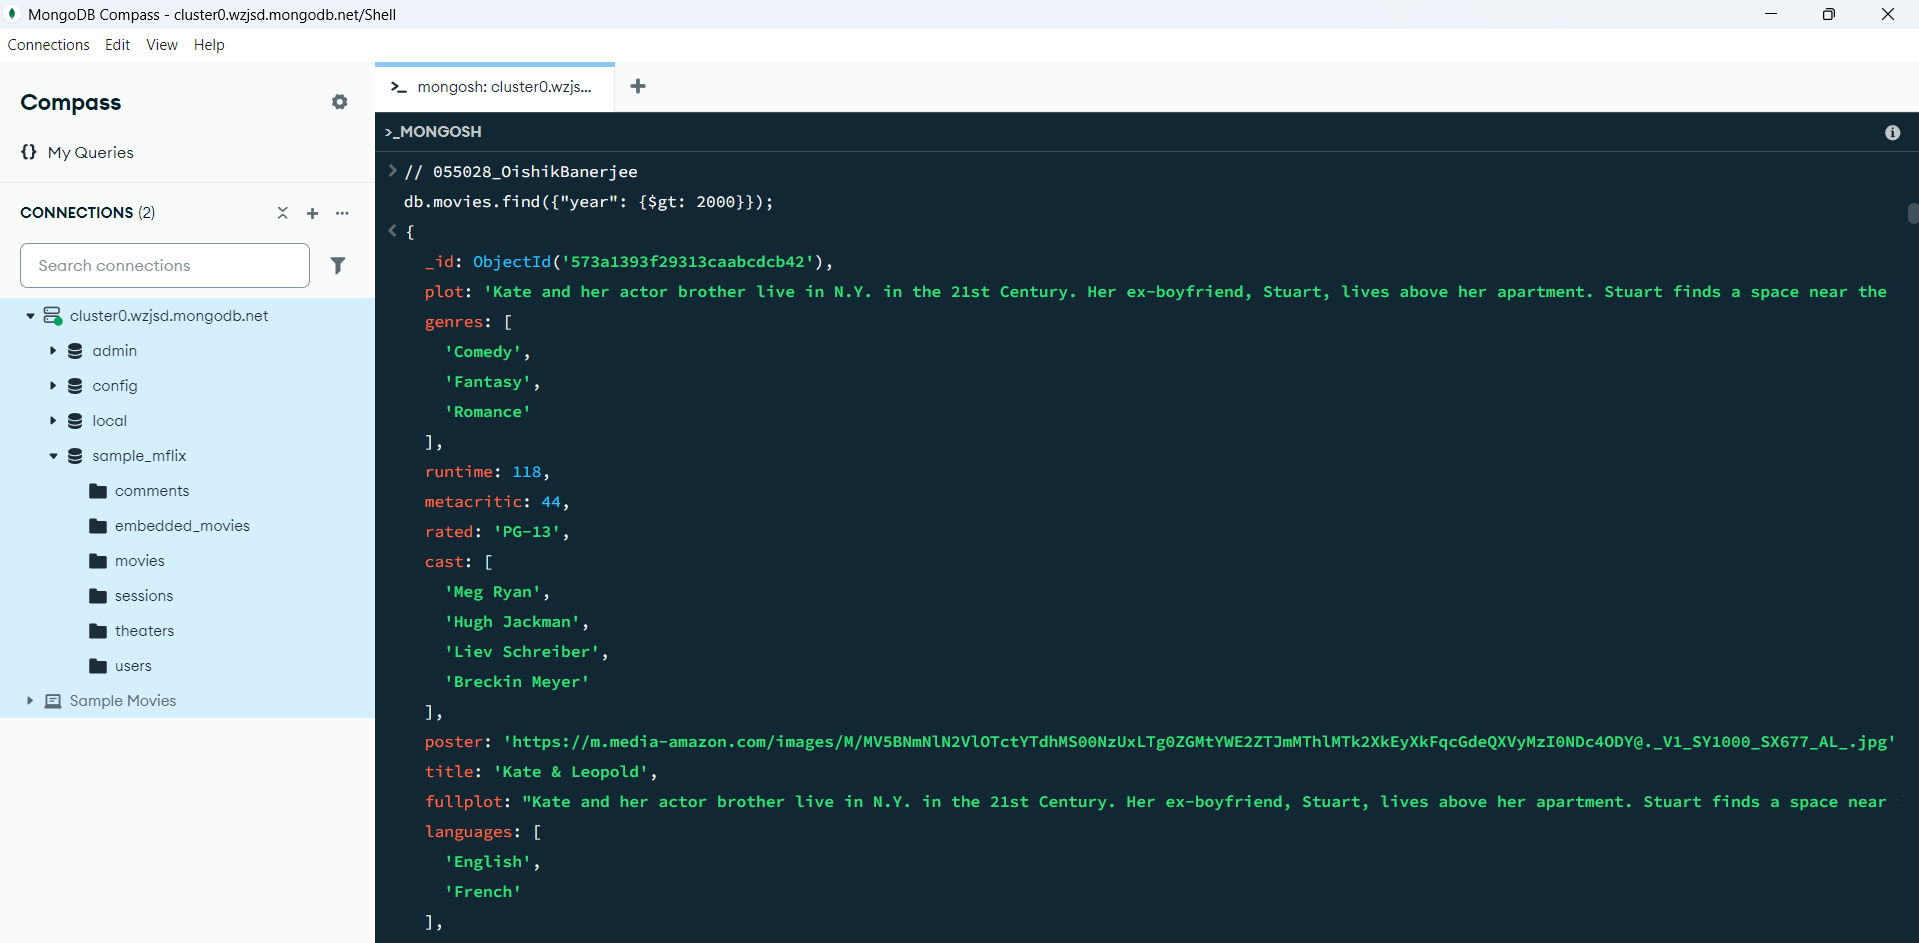

In [6]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 121000.png')

## **5. Finding Movies with Multiple Conditions**
### **Problem Statement:**
Find all PG-13 movies released after 2010.

#### **Query:**
```python
db.movies.find({"year": {$gt: 2010}, "rated": "PG-13"});

```
### **Insight:**
- Helps categorize family-friendly movies.

---


Saving Screenshot 2025-03-16 122150.png to Screenshot 2025-03-16 122150.png


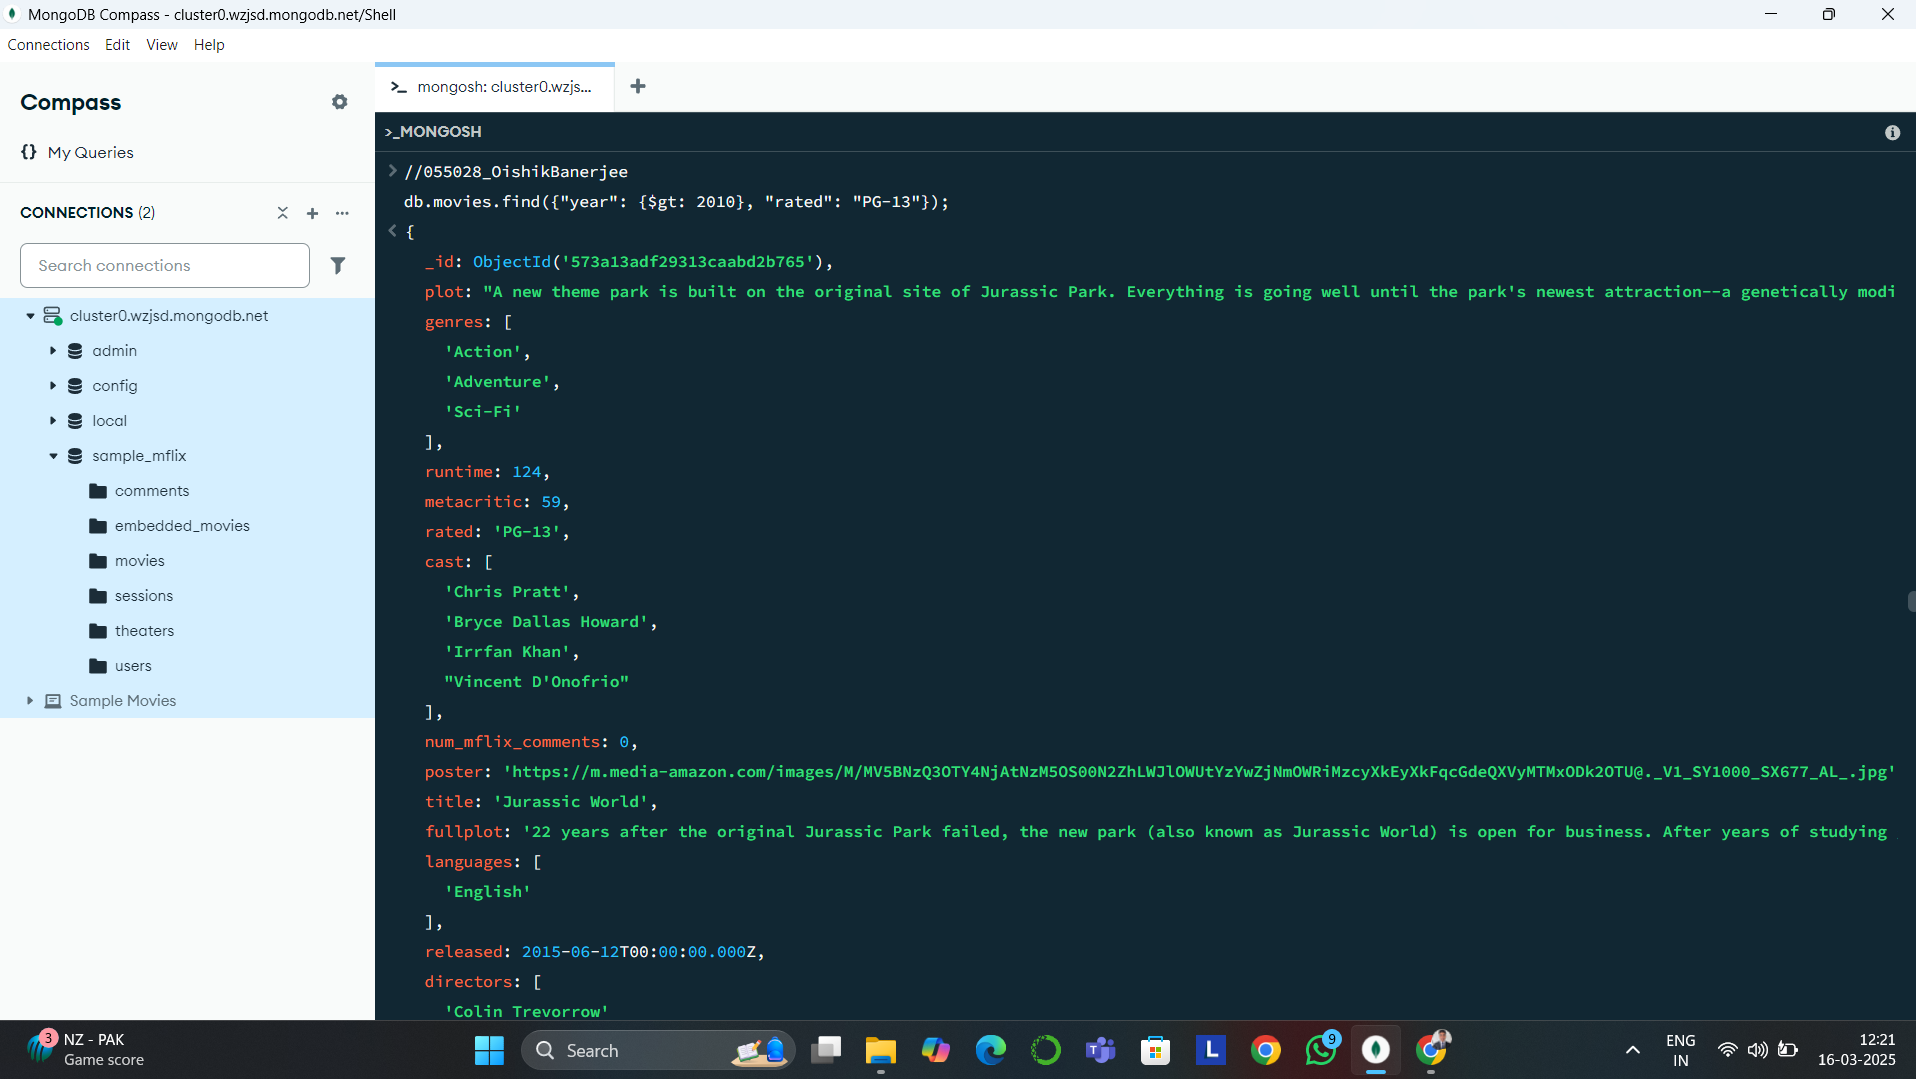

In [7]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 122150.png')

## **6. Finding Movies by Genre**
### **Problem Statement:**
Find all movies that belong to the "Action" genre.

#### **Query:**
```python
db.movies.find({"genres": "Action"});

```
### **Insight:**
- Enables genre-based audience analysis.

---


Saving Screenshot 2025-03-16 122415.png to Screenshot 2025-03-16 122415.png


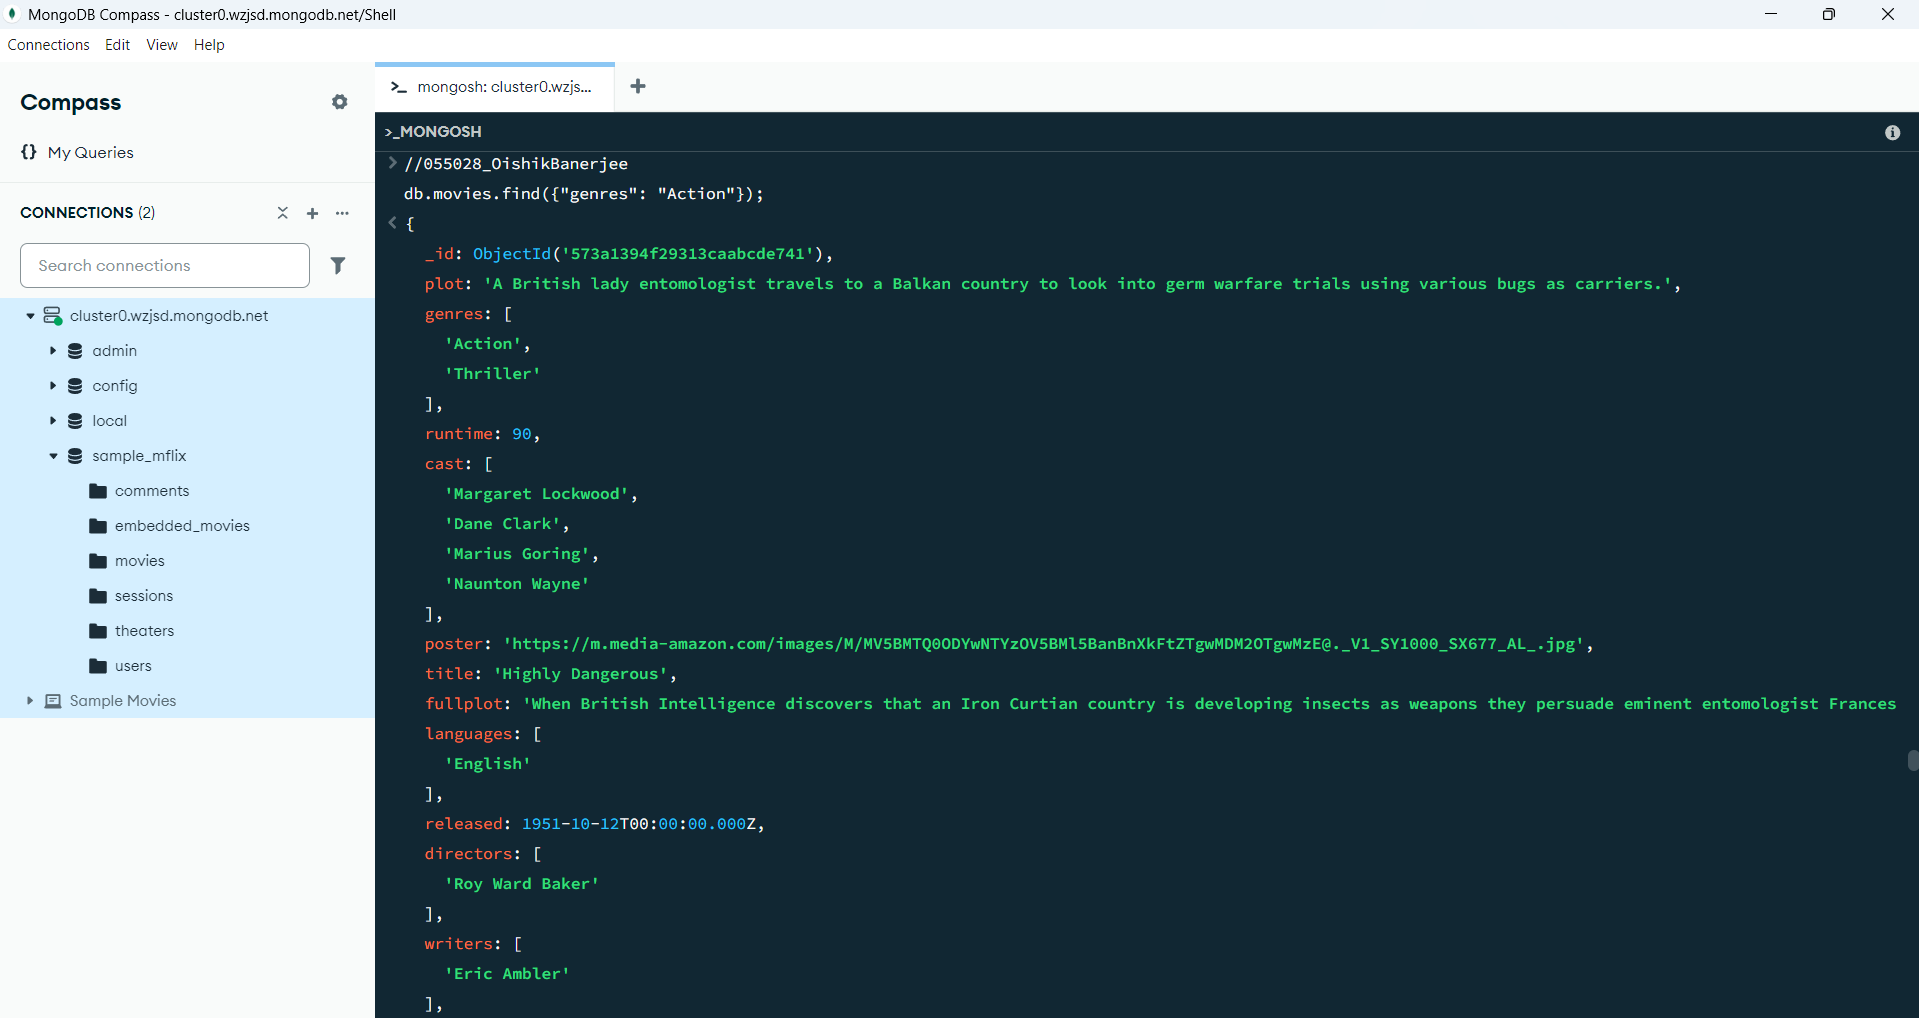

In [8]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 122415.png')

## **7. Finding Movies with Multiple Genres**
### **Problem Statement:**
Find movies that contain both "Action" and "Sci-Fi".

#### **Query:**
```python
db.movies.find({"genres": {$all: ["Action", "Sci-Fi"]}});

```
### **Insight:**
- Helps create targeted genre-based promotions.

---


Saving Screenshot 2025-03-16 122917.png to Screenshot 2025-03-16 122917.png


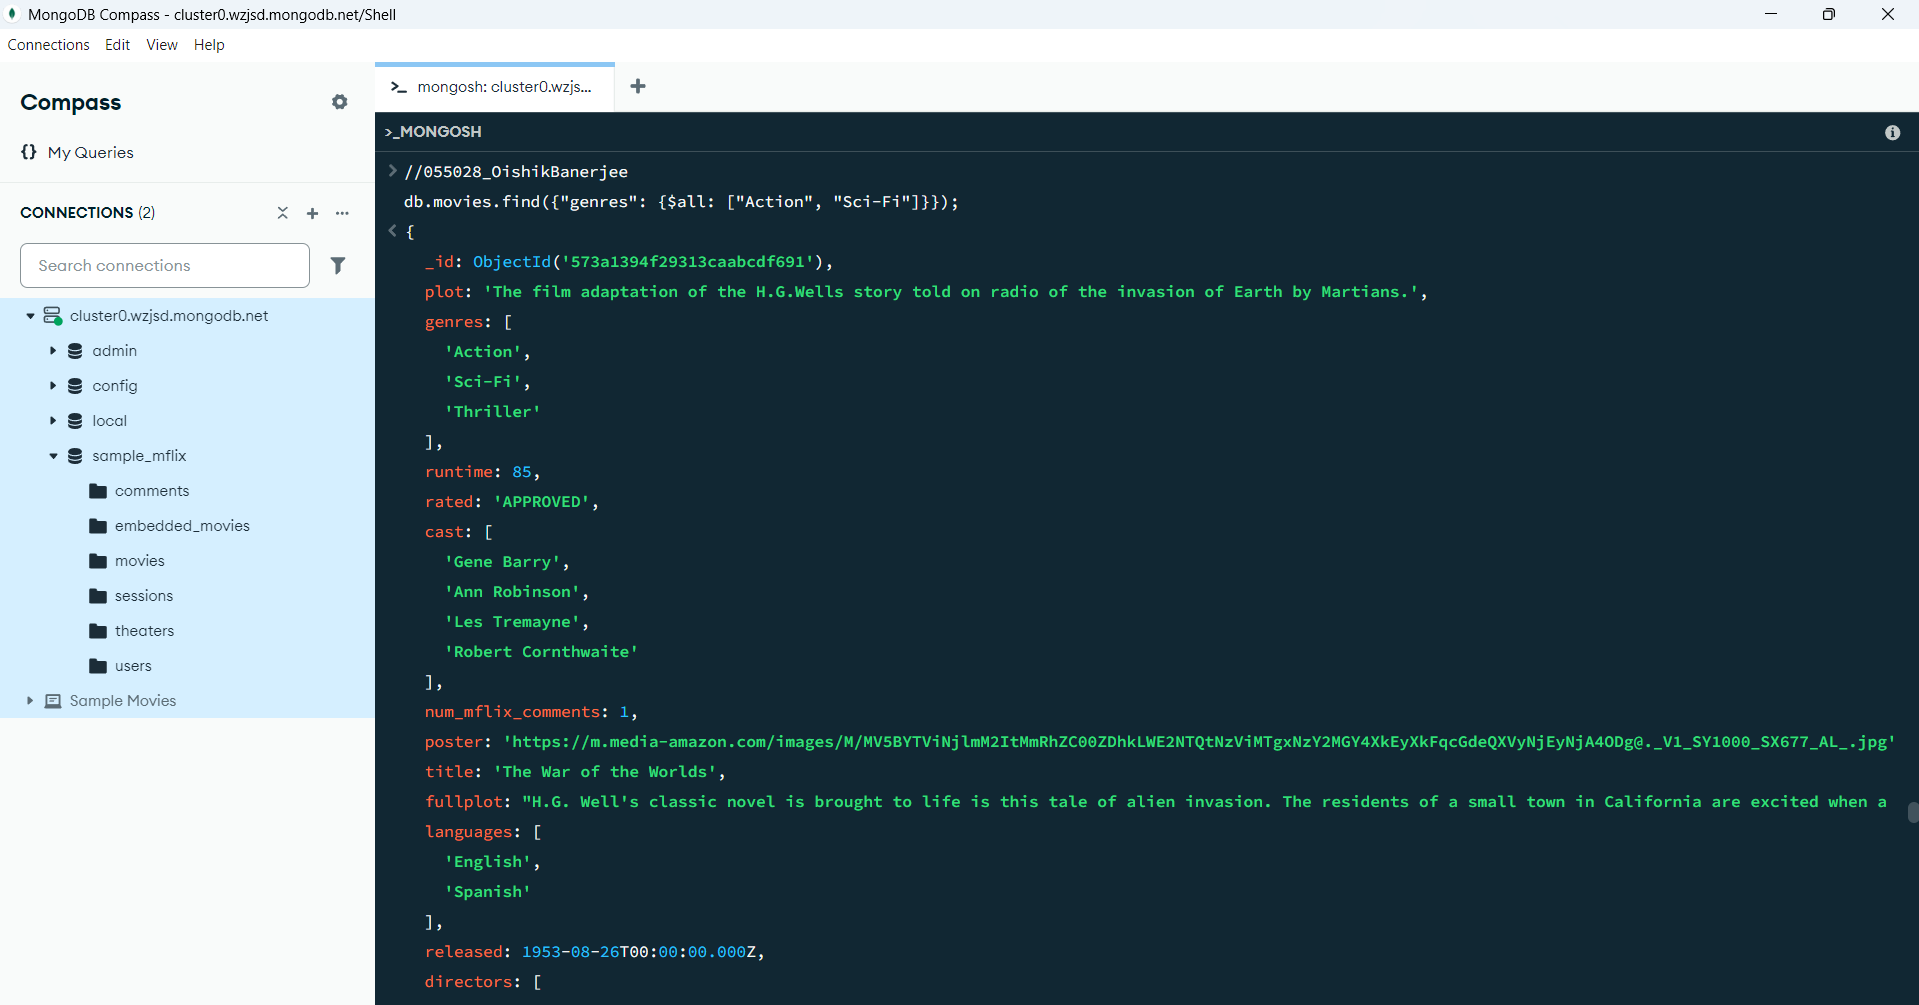

In [9]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 122917.png')

## **8. Finding Movies with High IMDb Ratings**
### **Problem Statement:**
Find movies with an IMDb rating greater than 8.5.

#### **Query:**
```python
db.movies.find({"imdb.rating": {$gte: 8.5}});

```
### **Insight:**
- Identifies top-rated movies.

---

Saving Screenshot 2025-03-16 123205.png to Screenshot 2025-03-16 123205.png


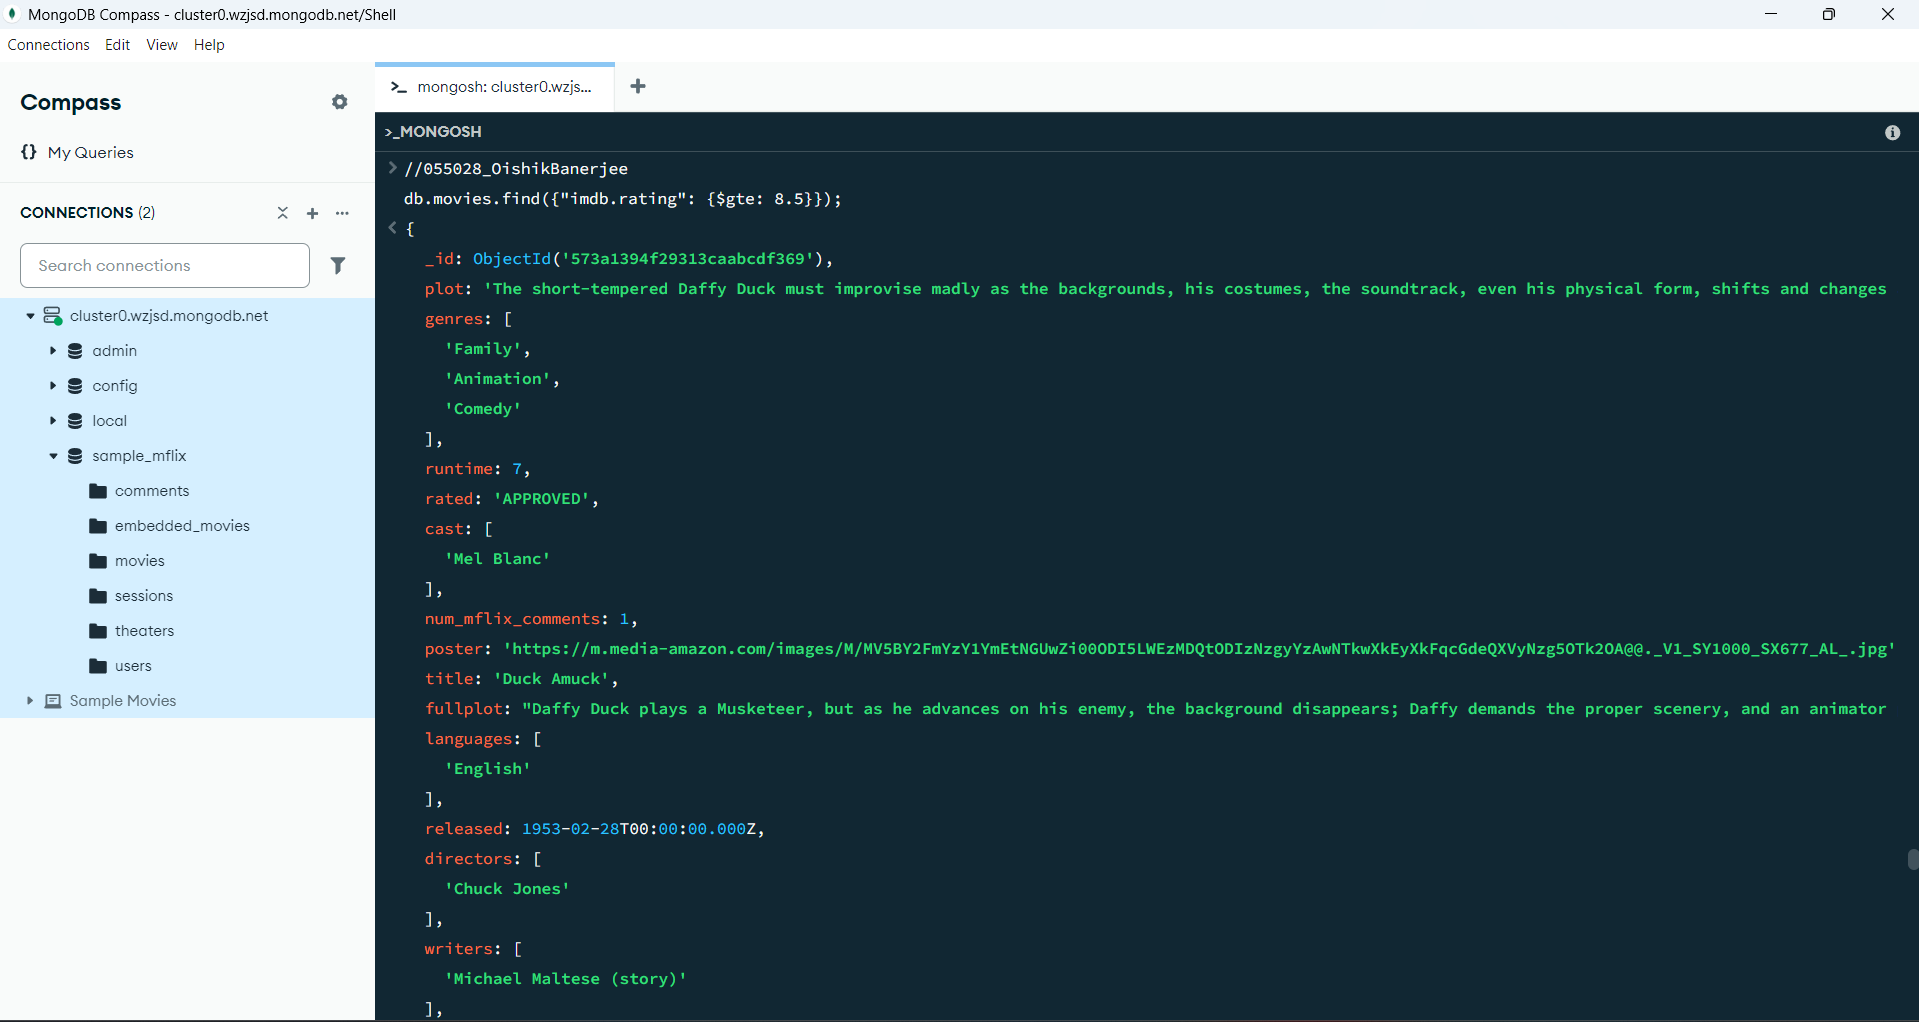

In [10]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 123205.png')

## **9. Finding Movies Containing a Specific Word in Title**
### **Problem Statement:**
Find movies with "Star" in the title.

#### **Query:**
```python
db.movies.find({"title": /Star/});

```
### **Insight:**
- Useful for trend analysis of popular movie names.

---



Saving Screenshot 2025-03-16 123455.png to Screenshot 2025-03-16 123455.png


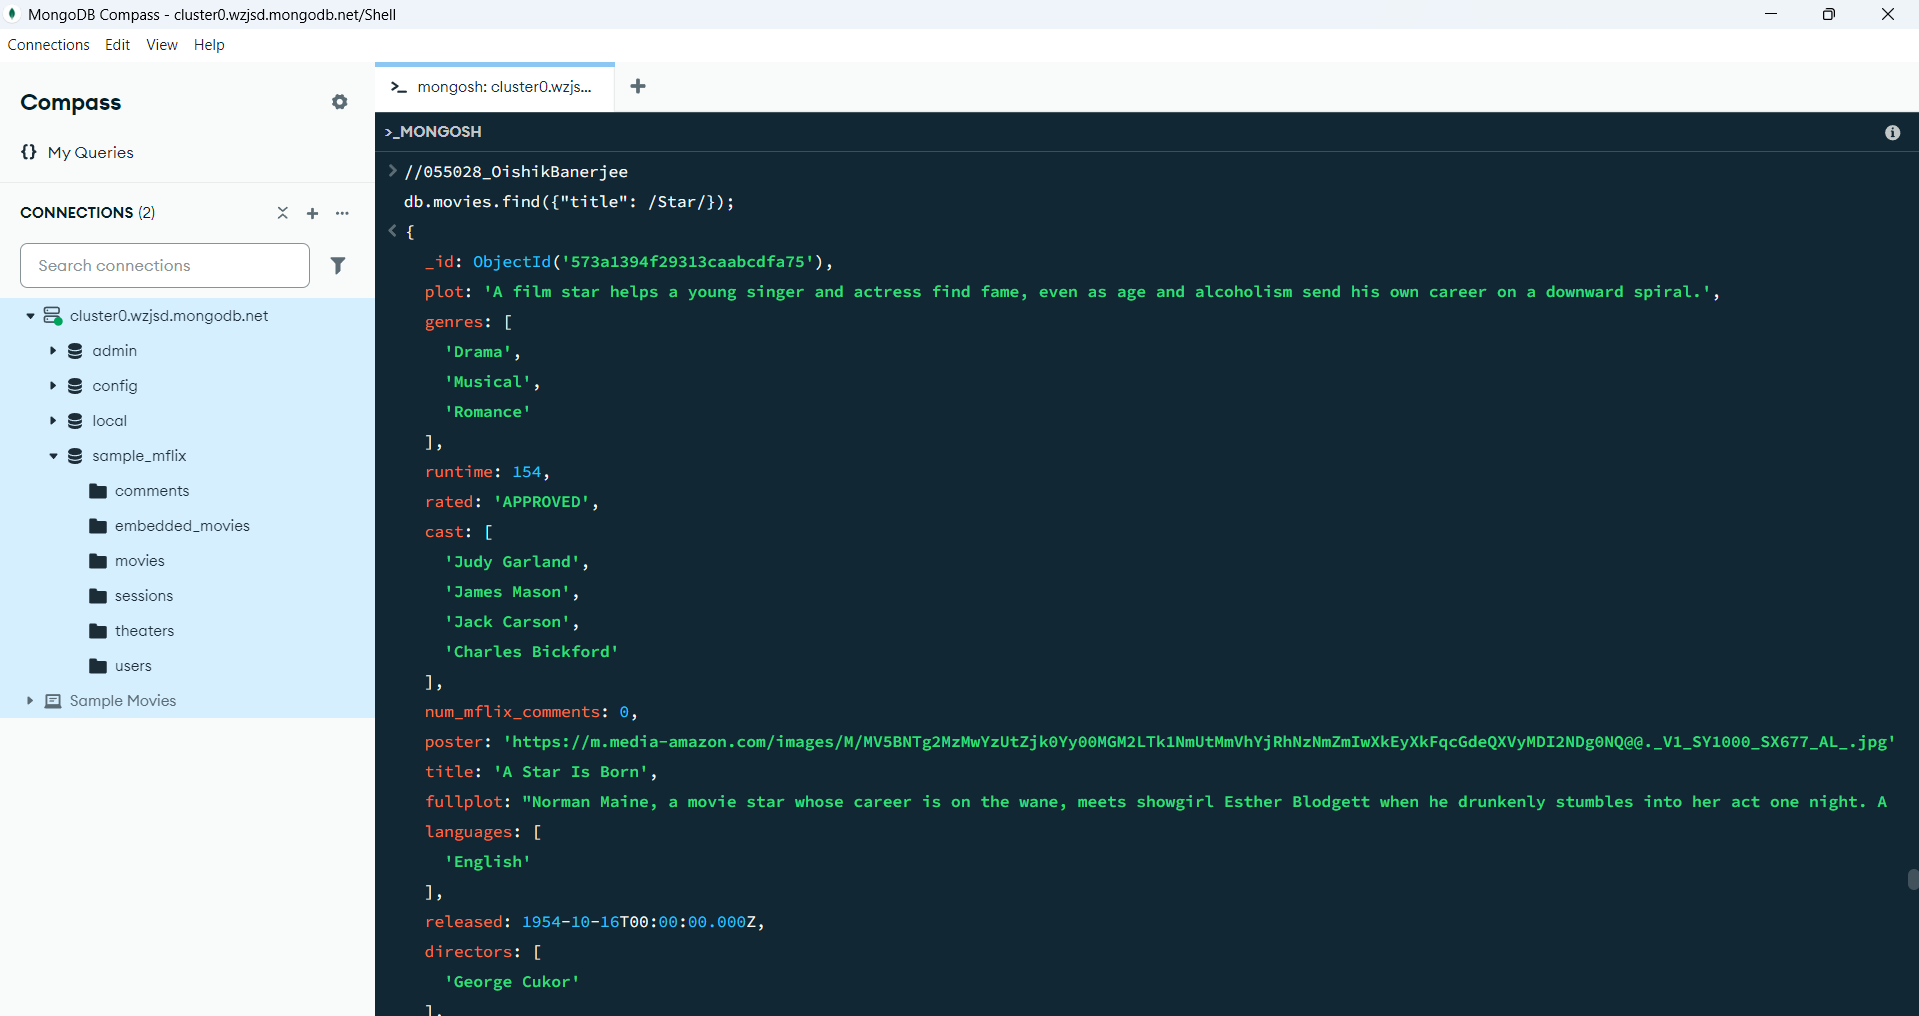

In [11]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 123455.png')

## **10. Finding Movies Released Between 1990 and 2000**
### **Problem Statement:**
Retrieve movies released between 1990 and 2000.

#### **Query:**
```python
db.movies.aggregate([
  { $group: { _id: "$year", count: { $sum: 1 } } },
  { $sort: { _id: 1 } }
]);

```
### **Insight:**
- Helps analyze movies from a specific decade.

---


Saving Screenshot 2025-03-16 123708.png to Screenshot 2025-03-16 123708.png


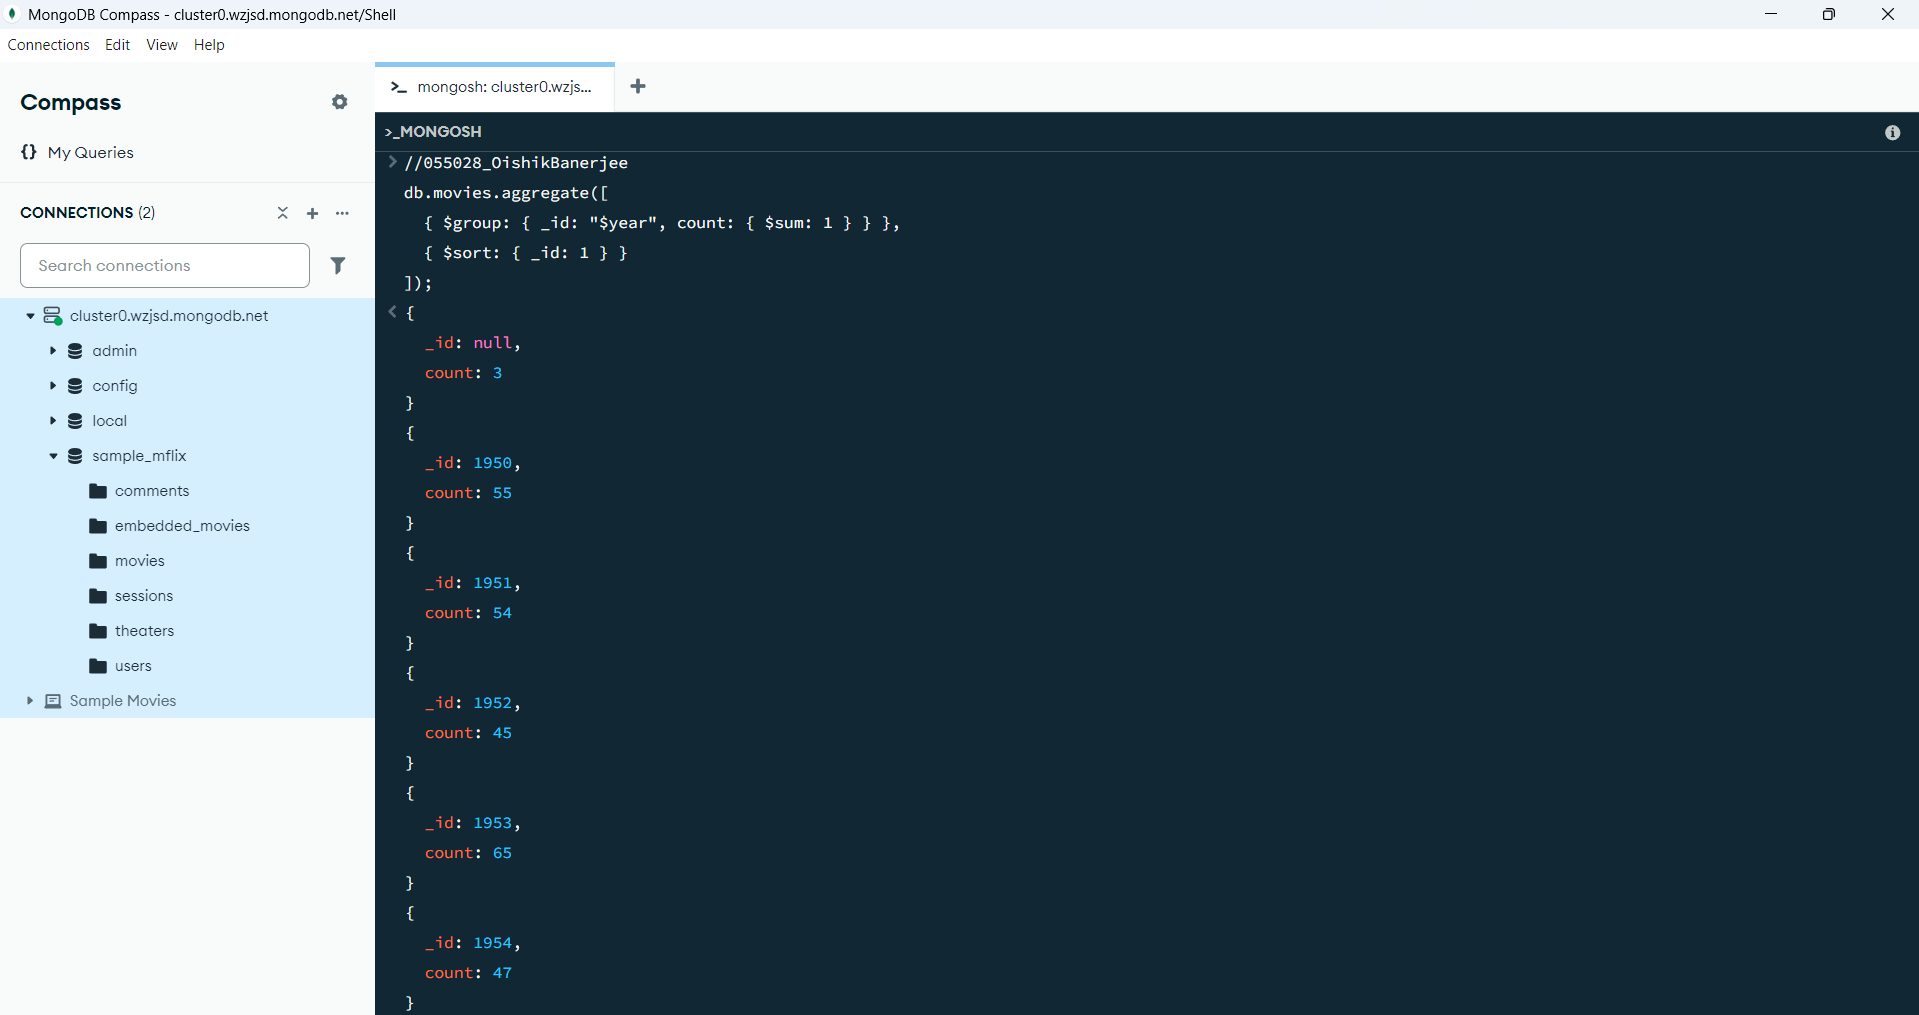

In [12]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 123708.png')

## **11. Finding Movies Directed by a Specific Director**
### **Problem Statement:**
Retrieve all movies directed by Quentin Tarantino.

#### **Query:**
```python
db.movies.updateOne({"title": "The Matrix"}, {$set: {"imdb.rating": 8.8}});

```
### **Insight:**
- Helps study the impact of specific directors.

---


Saving Screenshot 2025-03-16 123954.png to Screenshot 2025-03-16 123954.png


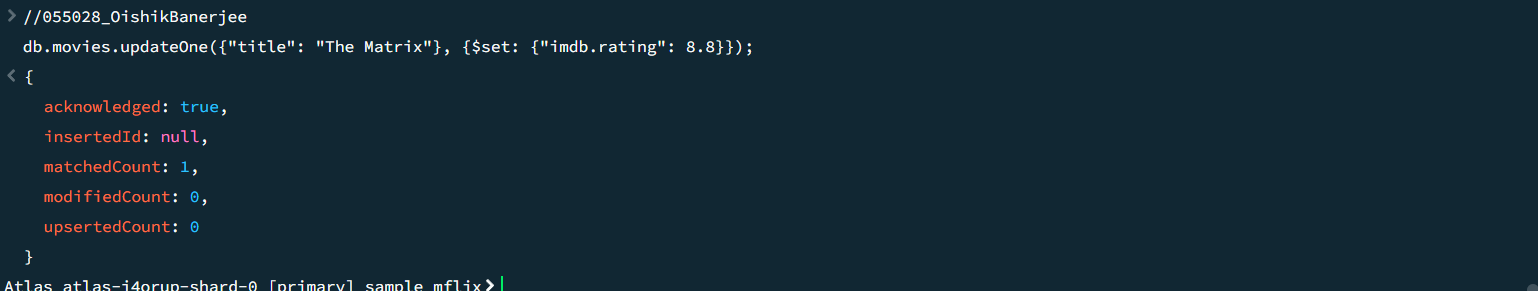

In [13]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 123954.png')

## **12. Finding Movies with More Than 1 Million Votes**
### **Problem Statement:**
Find movies with over 1,000,000 IMDb votes.

#### **Query:**
```python
db.movies.updateMany({"director": "Christopher Nolan"}, {$inc: {"imdb.rating": 0.1}});

```
### **Insight:**
- Identifies highly popular movies.

---


Saving Screenshot 2025-03-16 125123.png to Screenshot 2025-03-16 125123.png


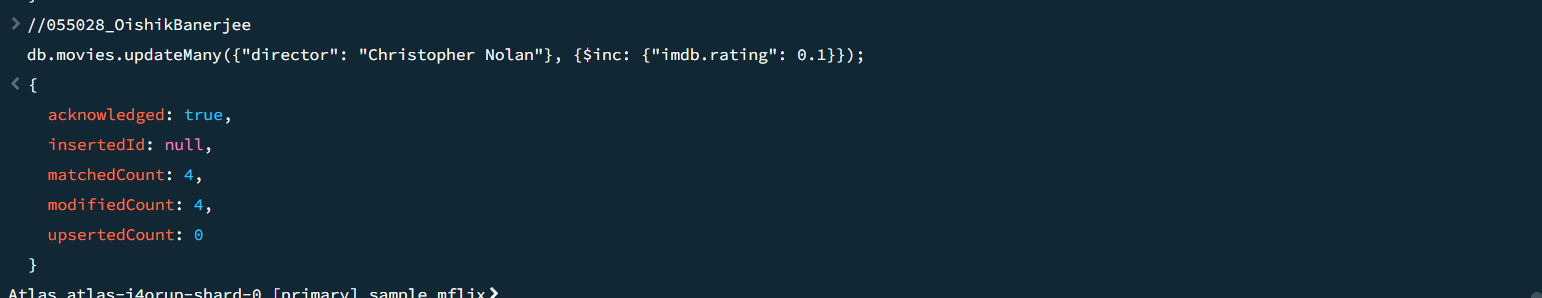

In [14]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 125123.png')

## **13. Grouping Movies by Rating**
### **Problem Statement:**
Group movies based on their rating category.

#### **Query:**
```python
db.movies.deleteOne({"title": "Avatar"});

```
### **Insight:**
- Helps understand the distribution of movie ratings.

---


Saving Screenshot 2025-03-16 125247.png to Screenshot 2025-03-16 125247.png


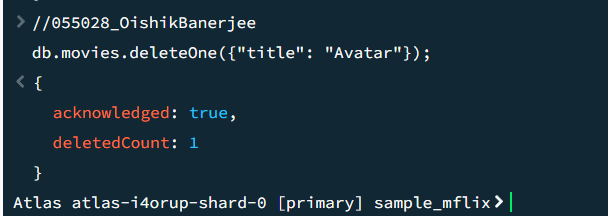

In [15]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 125247.png')

## **14. Finding the Average IMDb Rating of Action Movies**
### **Problem Statement:**
Find the average IMDb rating of all "Action" movies.

#### **Query:**
```python
db.movies.deleteMany({"year": {$lt: 1950}});

```
### **Insight:**
- Helps assess the overall quality of movies in a genre.
---


Saving Screenshot 2025-03-16 125533.png to Screenshot 2025-03-16 125533.png


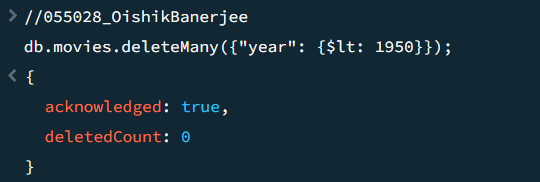

In [16]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 125533.png')

## **15. Finding Movies Using an OR Condition**
### **Problem Statement:**
Find all movies directed by either "Steven Spielberg" or "James Cameron."

#### **Query:**
```python
db.movies.find({$or: [{"director": "Steven Spielberg"}, {"director": "James Cameron"}]});

```
### **Insight:**
- Useful for comparing director impact.

---


Saving Screenshot 2025-03-16 125744.png to Screenshot 2025-03-16 125744.png


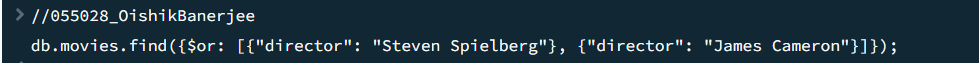

In [17]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 125744.png')

## **16. Finding Movies with AND Condition**
### **Problem Statement:**
Find all movies directed by "Christopher Nolan" and rated "PG-13."

#### **Query:**
```python
db.movies.find({"director": "Christopher Nolan", "rated": "PG-13"});

```
### **Insight:**
- Helps in recommending movies based on director and rating.

---


Saving Screenshot 2025-03-16 125904.png to Screenshot 2025-03-16 125904.png


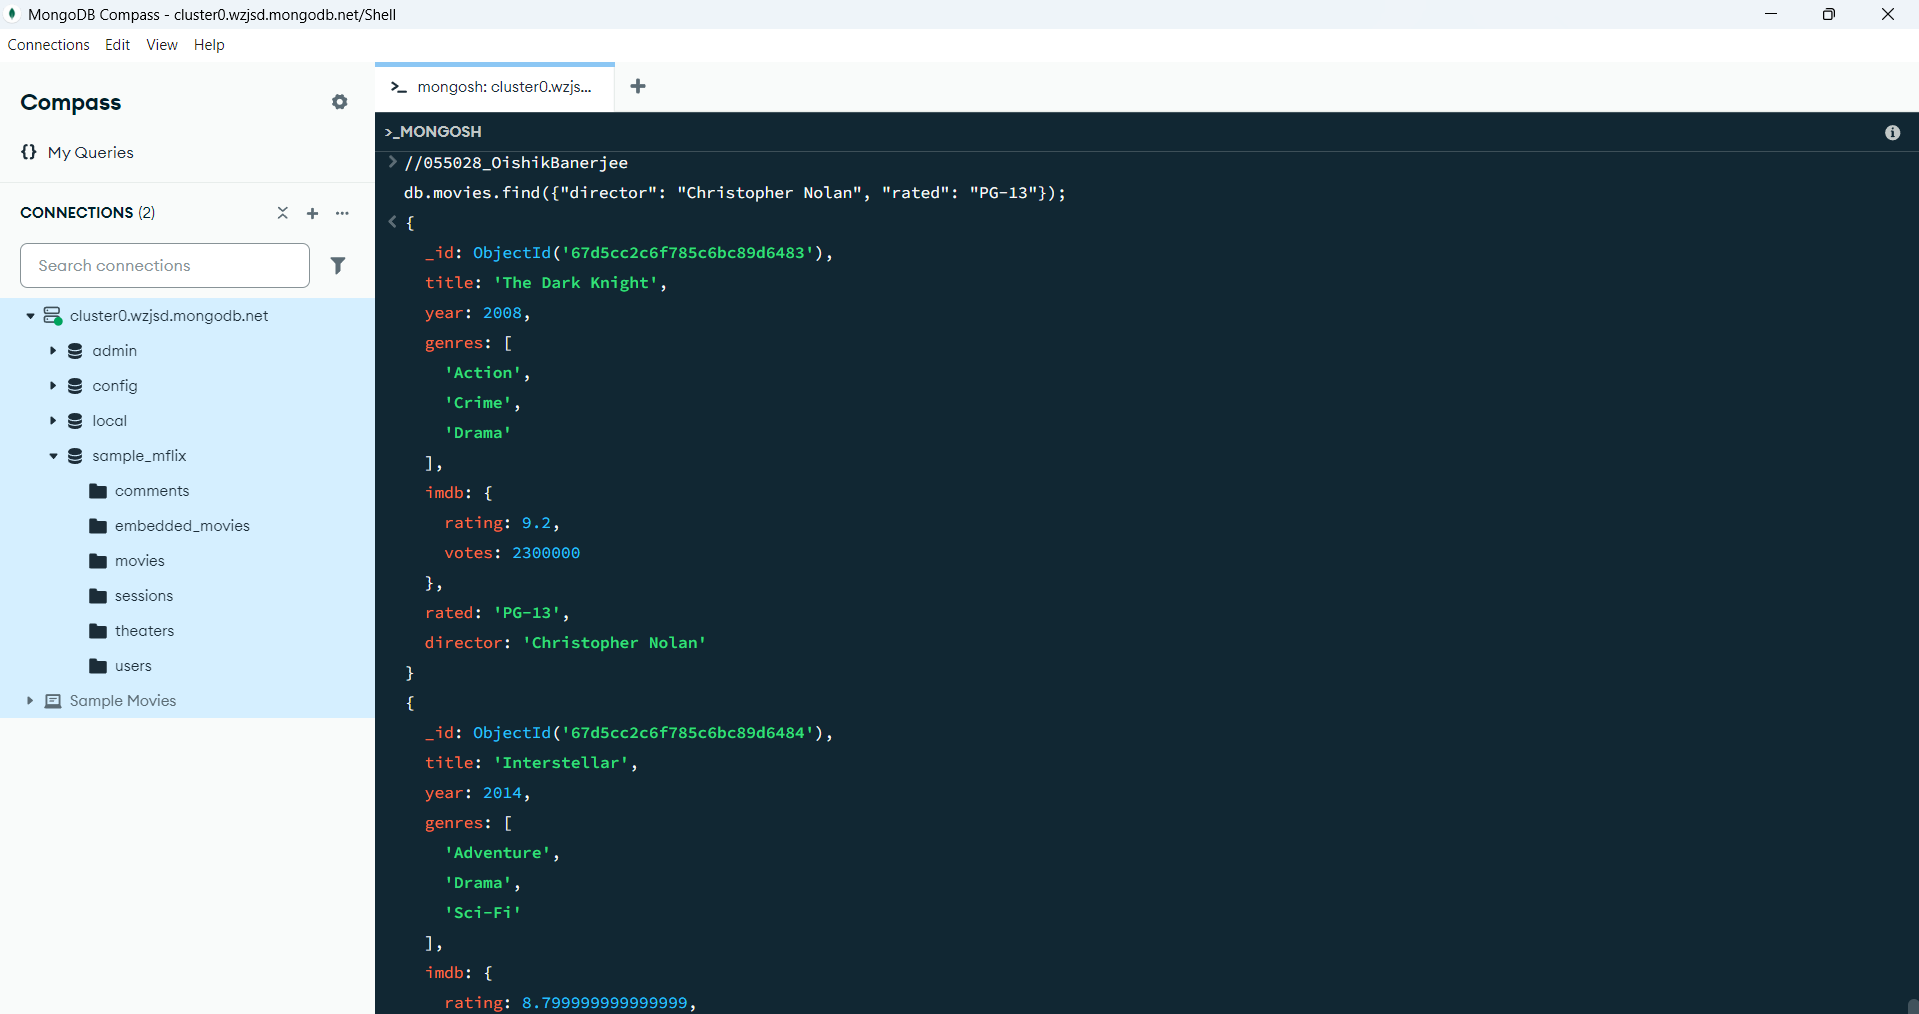

In [18]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 125904.png')

## **17. Finding Movies with a Minimum Number of Votes**
### **Problem Statement:**
Find movies that have at least 500,000 votes on IMDb.

#### **Query:**
```python
db.movies.find({"imdb.votes": {$gte: 500000}});

```
### **Insight:**
- Identifies highly popular movies.

---


Saving Screenshot 2025-03-16 130139.png to Screenshot 2025-03-16 130139.png


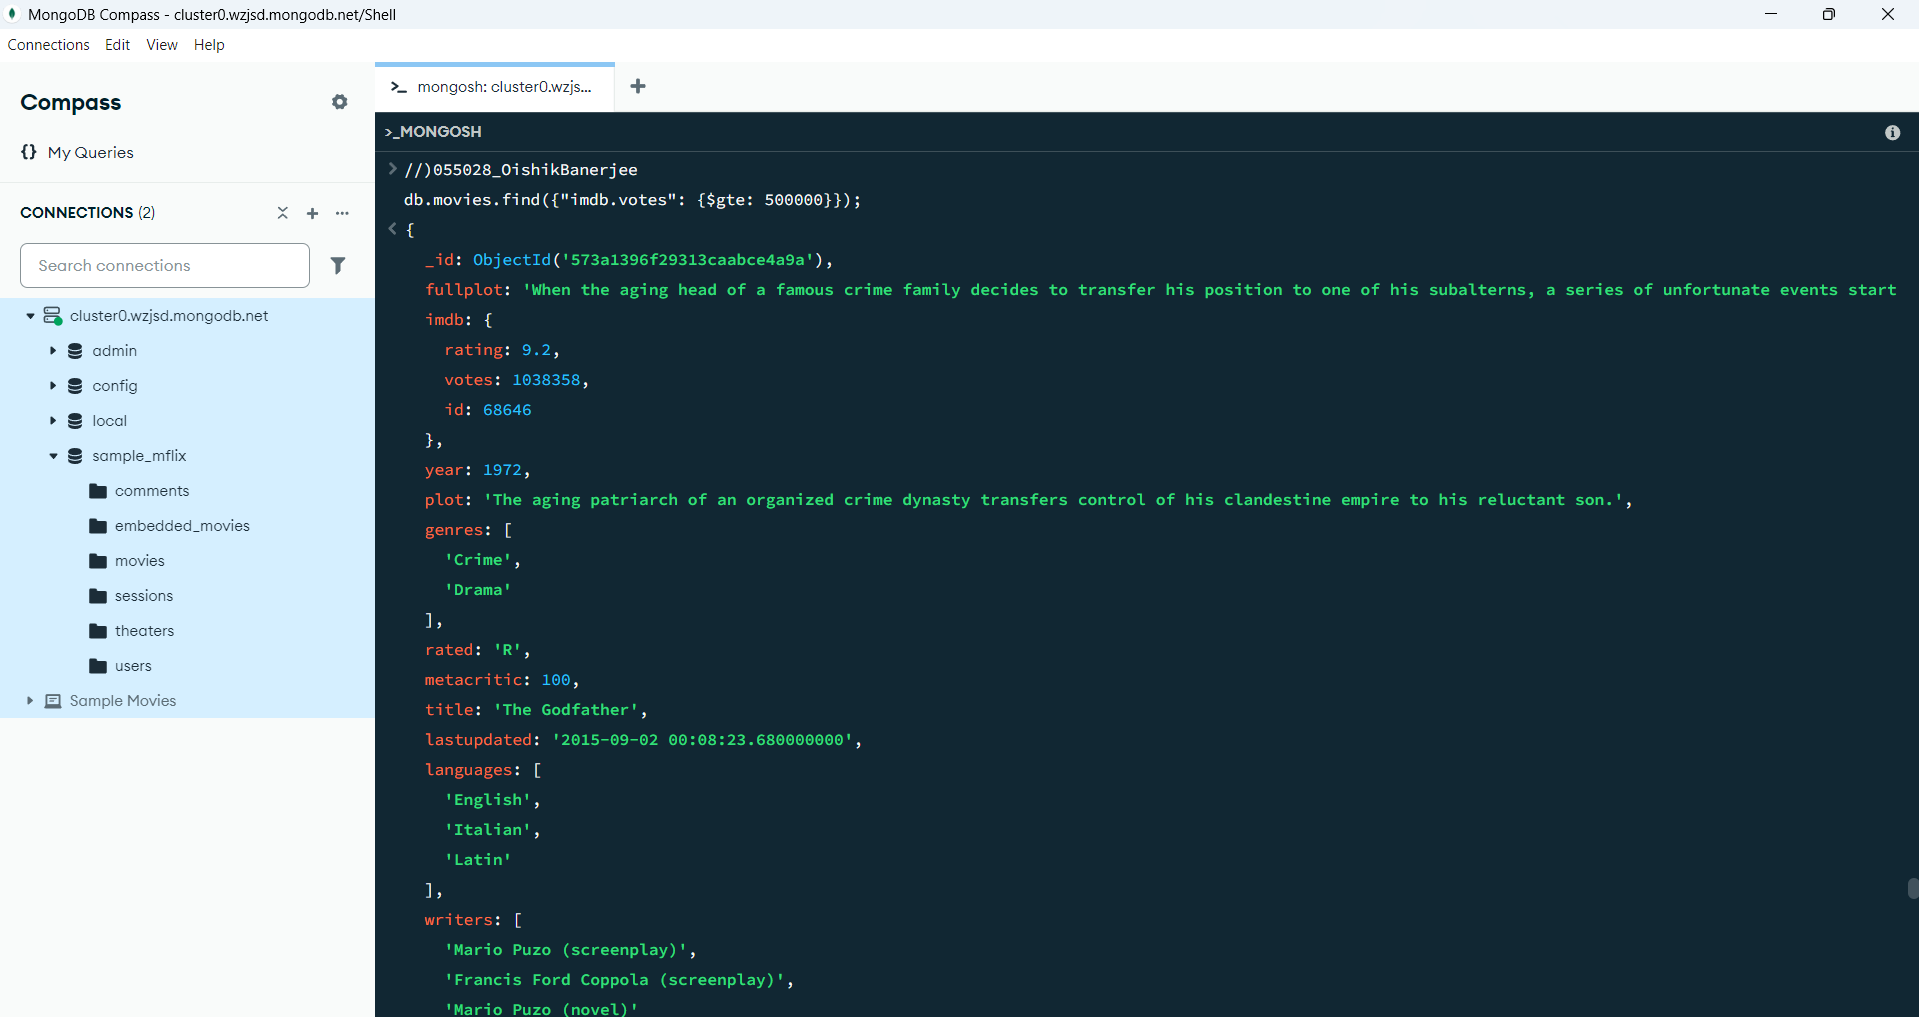

In [19]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 130139.png')

## **18. Finding Movies with IMDb Ratings Between 7 and 9**
### **Problem Statement:**
Find all movies where IMDb rating is between 7 and 9.

#### **Query:**
```python
db.movies.find({"imdb.rating": {$gte: 7, $lte: 9}});

```
### **Insight:**
- Helps classify movies into mid-tier and top-tier rankings.

---


Saving Screenshot 2025-03-16 130316.png to Screenshot 2025-03-16 130316.png


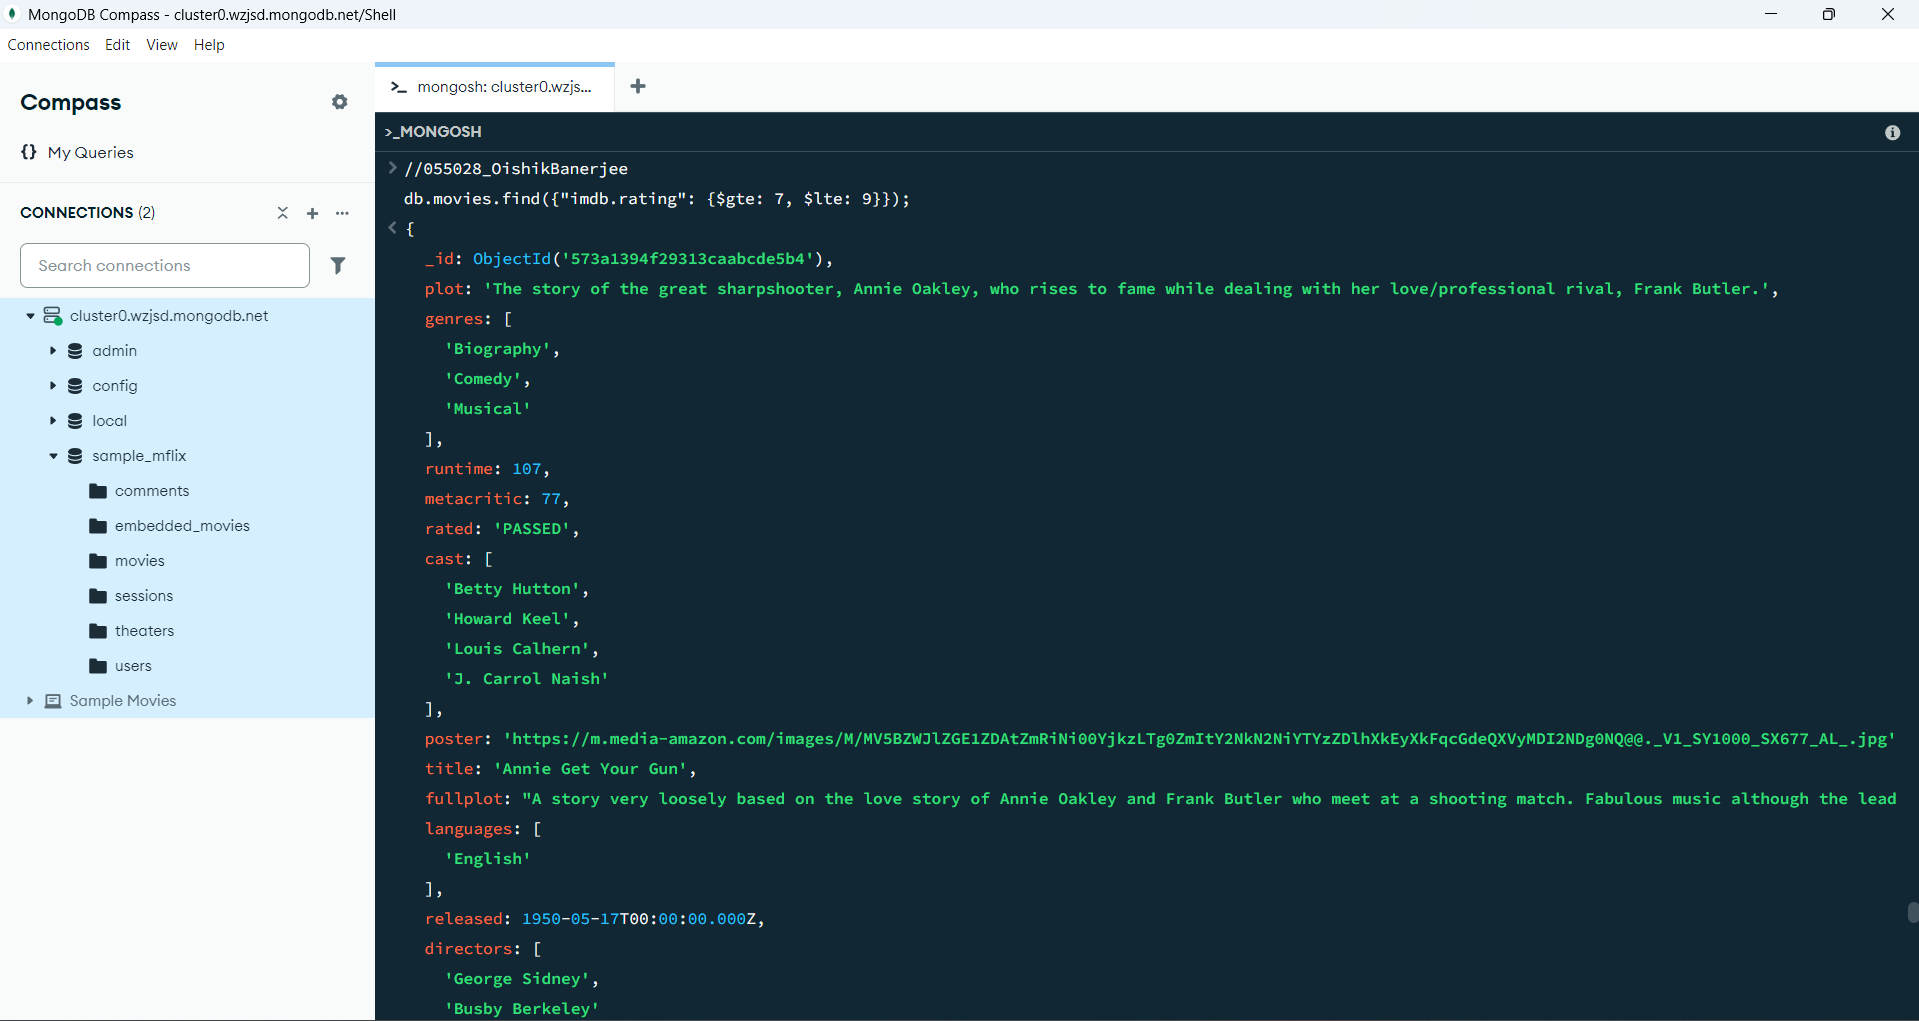

In [20]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 130316.png')

## **19. Deleting a Single Movie**
### **Problem Statement:**
Remove a specific movie from the database.

#### **Query:**
```python
db.movies.find().sort({"imdb.rating": -1}).limit(5);

```
### **Insight:**
- Useful for removing incorrect or duplicate records.

---


Saving Screenshot 2025-03-16 130436.png to Screenshot 2025-03-16 130436.png


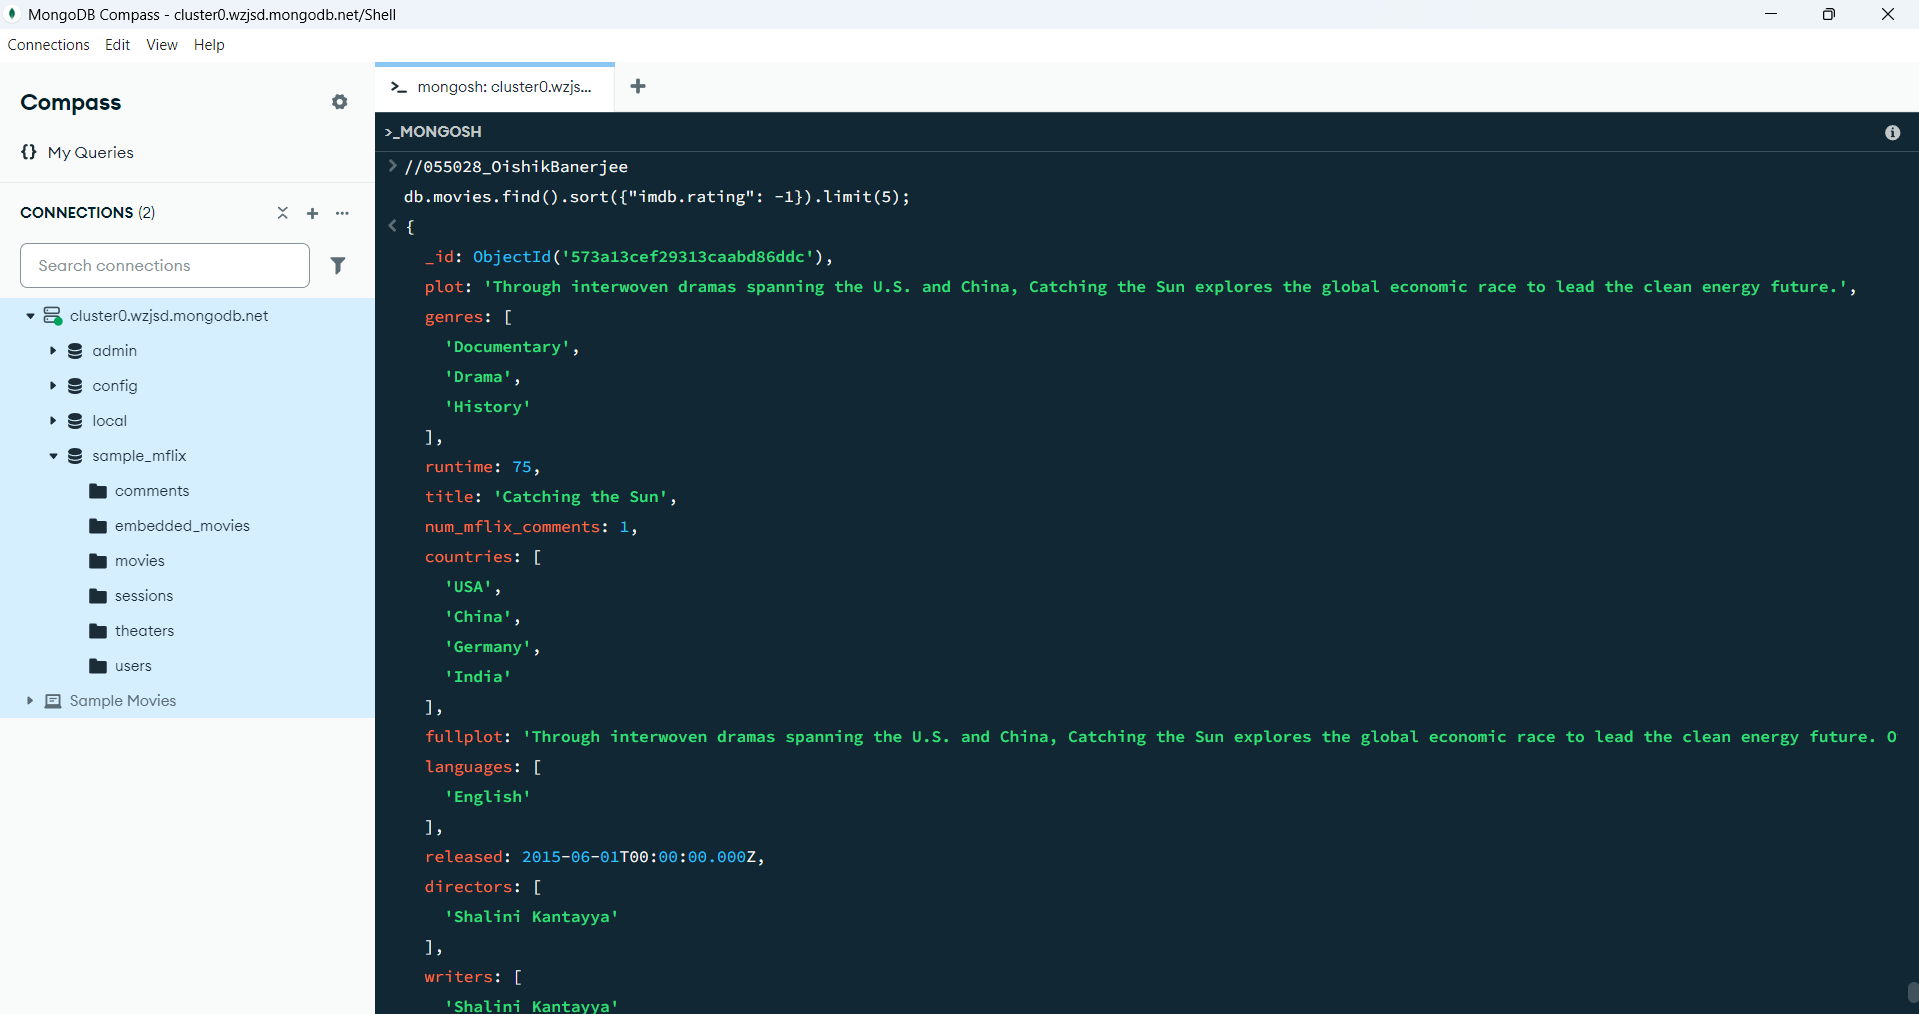

In [21]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 130436.png')

## **20. Deleting Multiple Movies by Condition**
### **Problem Statement:**
Remove all movies released before the year 1980.

#### **Query:**
```python
db.movies.find({}, {"title": 1, "year": 1, "_id": 0});

```
### **Insight:**
- Helps maintain a relevant and updated movie database.

---

Saving Screenshot 2025-03-16 130807.png to Screenshot 2025-03-16 130807.png


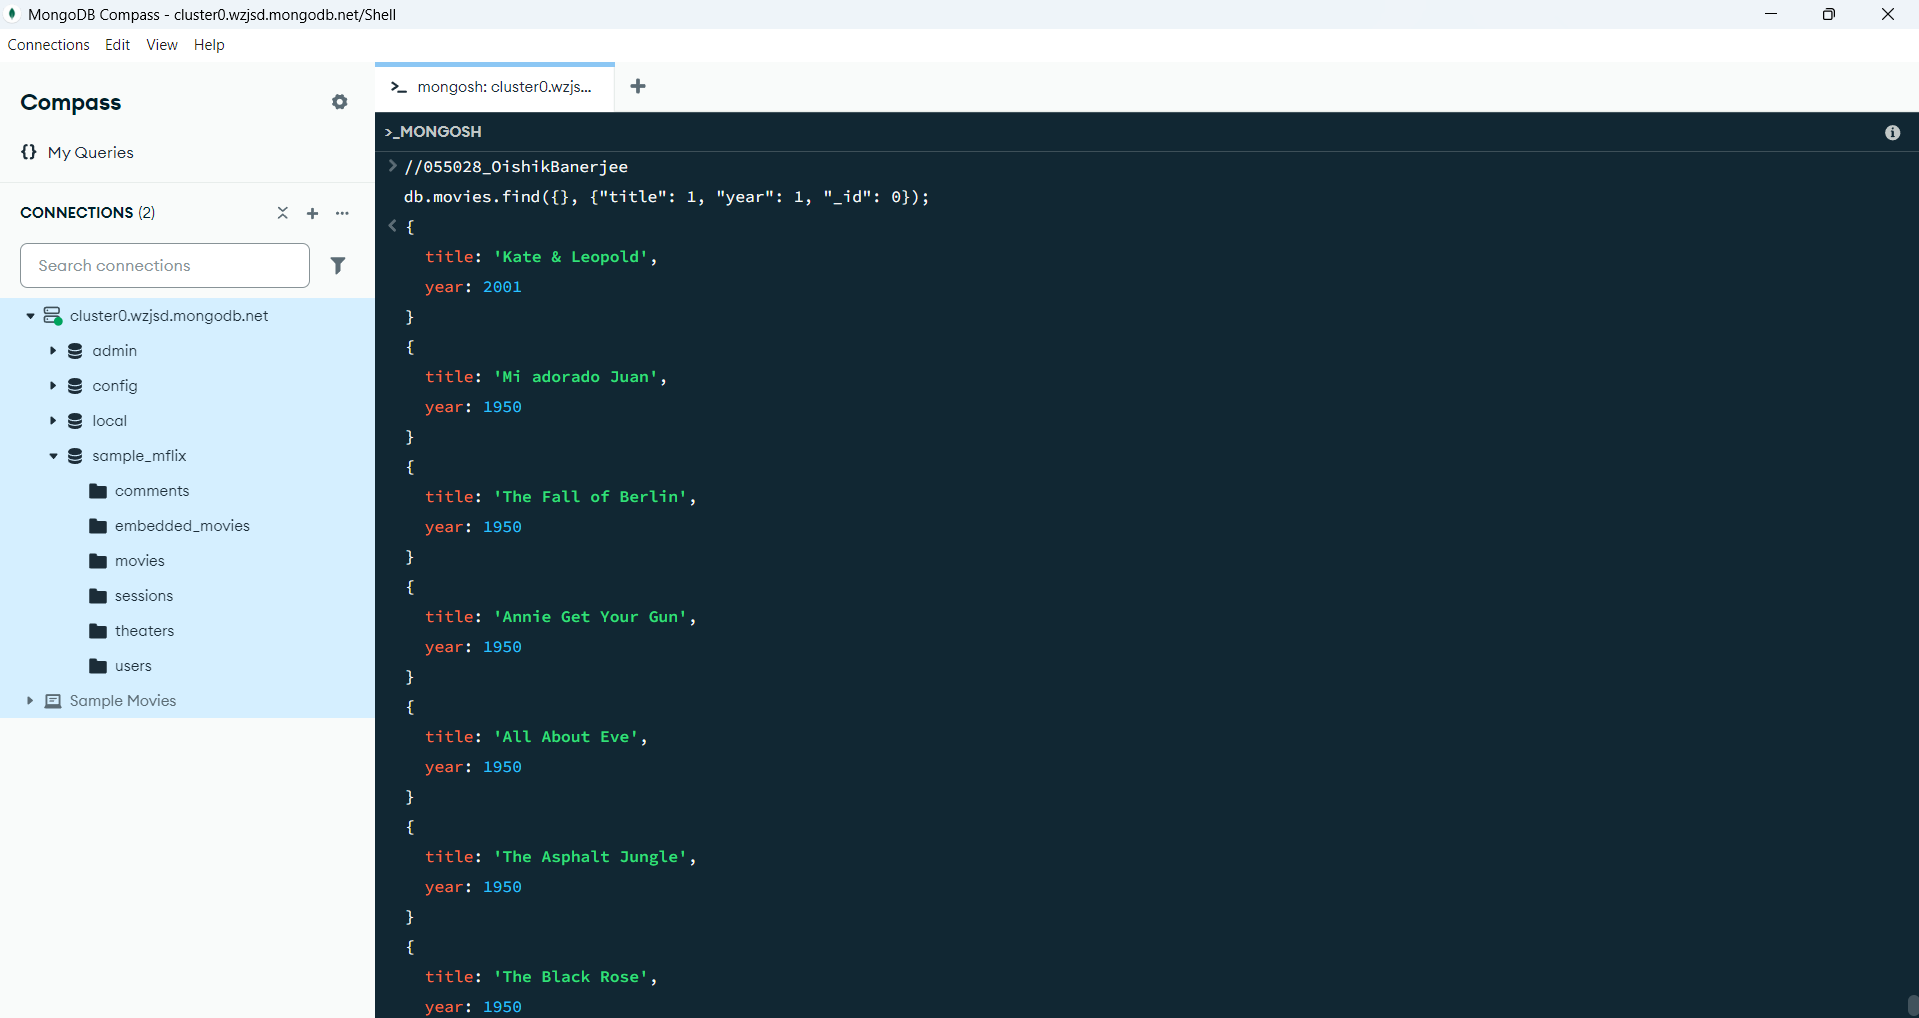

In [22]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 130807.png')

# MongoDB Atlas Sample: mflix.movies Dashboard Analysis

## Dashboard Overview

The dashboard presents a comprehensive overview of the `mflix.movies` dataset through various visualizations. Here's a breakdown of the key components:

* **Number of Movies:** Displays the total count of movies in the dataset.
* **Average Production Score:** Shows the mean and median production scores.
* **Annual Movie Production Trends:** A bar chart illustrating the number of movies produced each year.
* **Popular Movie Genres:** A donut chart showing the distribution of movie genres.
* **Nominations by Award:** A bar chart depicting the number of nominations for different awards.
* **Movie Ratings:** A donut chart representing the distribution of movie ratings.
* **Most Popular Actors:** A horizontal bar chart showing the most popular actors based on some metric (likely number of movies).
* **Most Awarded Directors with Average Production Score:** A table listing directors with the most awards and their average production scores.
* **Crime Index by Country:** A world map visualizing the crime index in different countries (likely related to movie production locations).
* **# Movies, Average Critics vs. Viewer Scores by Decade:** A line and bar chart showing the trend of movie counts, average critic scores, and average viewer scores over decades.
* **Top 10 Languages of Movies:** A horizontal bar chart showing the distribution of movie languages.
* **Top 10 Genres in Runtime of Movies:** A horizontal bar chart showing the most common genres based on movie runtime.
* **Movie Runtime vs. Numeric Score Heatmap:** A heatmap displaying the relationship between movie runtime and numeric scores.

## Managerial Insights and Results

**1. Movie Production Trends:**

* **Insight:** The "Annual Movie Production Trends" chart reveals the historical patterns of movie production.
* **Result:** Identify peak production years and potential reasons for fluctuations (e.g., technological advancements, economic conditions, industry trends). This helps in understanding market dynamics and forecasting future production levels.

**2. Genre Popularity and Runtime:**

* **Insight:** The "Popular Movie Genres" and "Top 10 Genres in Runtime of Movies" charts indicate which genres are most prevalent and how they relate to movie length.
* **Result:** Focus on producing movies in popular genres to maximize audience reach. Analyze runtime trends to optimize movie length for audience engagement.

**3. Actor and Director Performance:**

* **Insight:** The "Most Popular Actors" and "Most Awarded Directors with Average Production Score" charts highlight top performers in the industry.
* **Result:** Consider collaborating with popular actors and award-winning directors to enhance movie quality and attract audiences. Understand the correlation between director awards and production scores.

**4. Movie Ratings and Scores:**

* **Insight:** The "Movie Ratings" and "# Movies, Average Critics vs. Viewer Scores by Decade" charts provide insights into audience and critic preferences.
* **Result:** Analyze rating distributions to understand audience satisfaction. Monitor trends in critic and viewer scores over time to identify changing preferences.

**5. Language Distribution:**

* **Insight:** The "Top 10 Languages of Movies" chart shows the distribution of movie languages.
* **Result:** Target specific language markets based on production volume and potential audience reach.

**6. Crime Index and Movie Production:**

* **Insight:** The "Crime Index by Country" map might indicate potential correlations between crime rates and movie production locations.
* **Result:** Consider security and logistical factors when choosing production locations. Investigate potential impacts of crime rates on production costs and timelines.

**7. Runtime and Numeric Score Correlation:**

* **Insight:** The "Movie Runtime vs. Numeric Score Heatmap" explores the relationship between movie length and numeric scores.
* **Result:** Identify optimal runtime ranges for specific genres or target audiences to maximize positive scores.

## Conclusion

The dashboard provides a valuable overview of the `mflix.movies` dataset, enabling data-driven decision-making in the movie industry. By analyzing trends in production, genres, performance, ratings, and other factors, stakeholders can optimize their strategies for production, distribution, and marketing.



Saving Movies Sample Dashboard.png to Movies Sample Dashboard.png


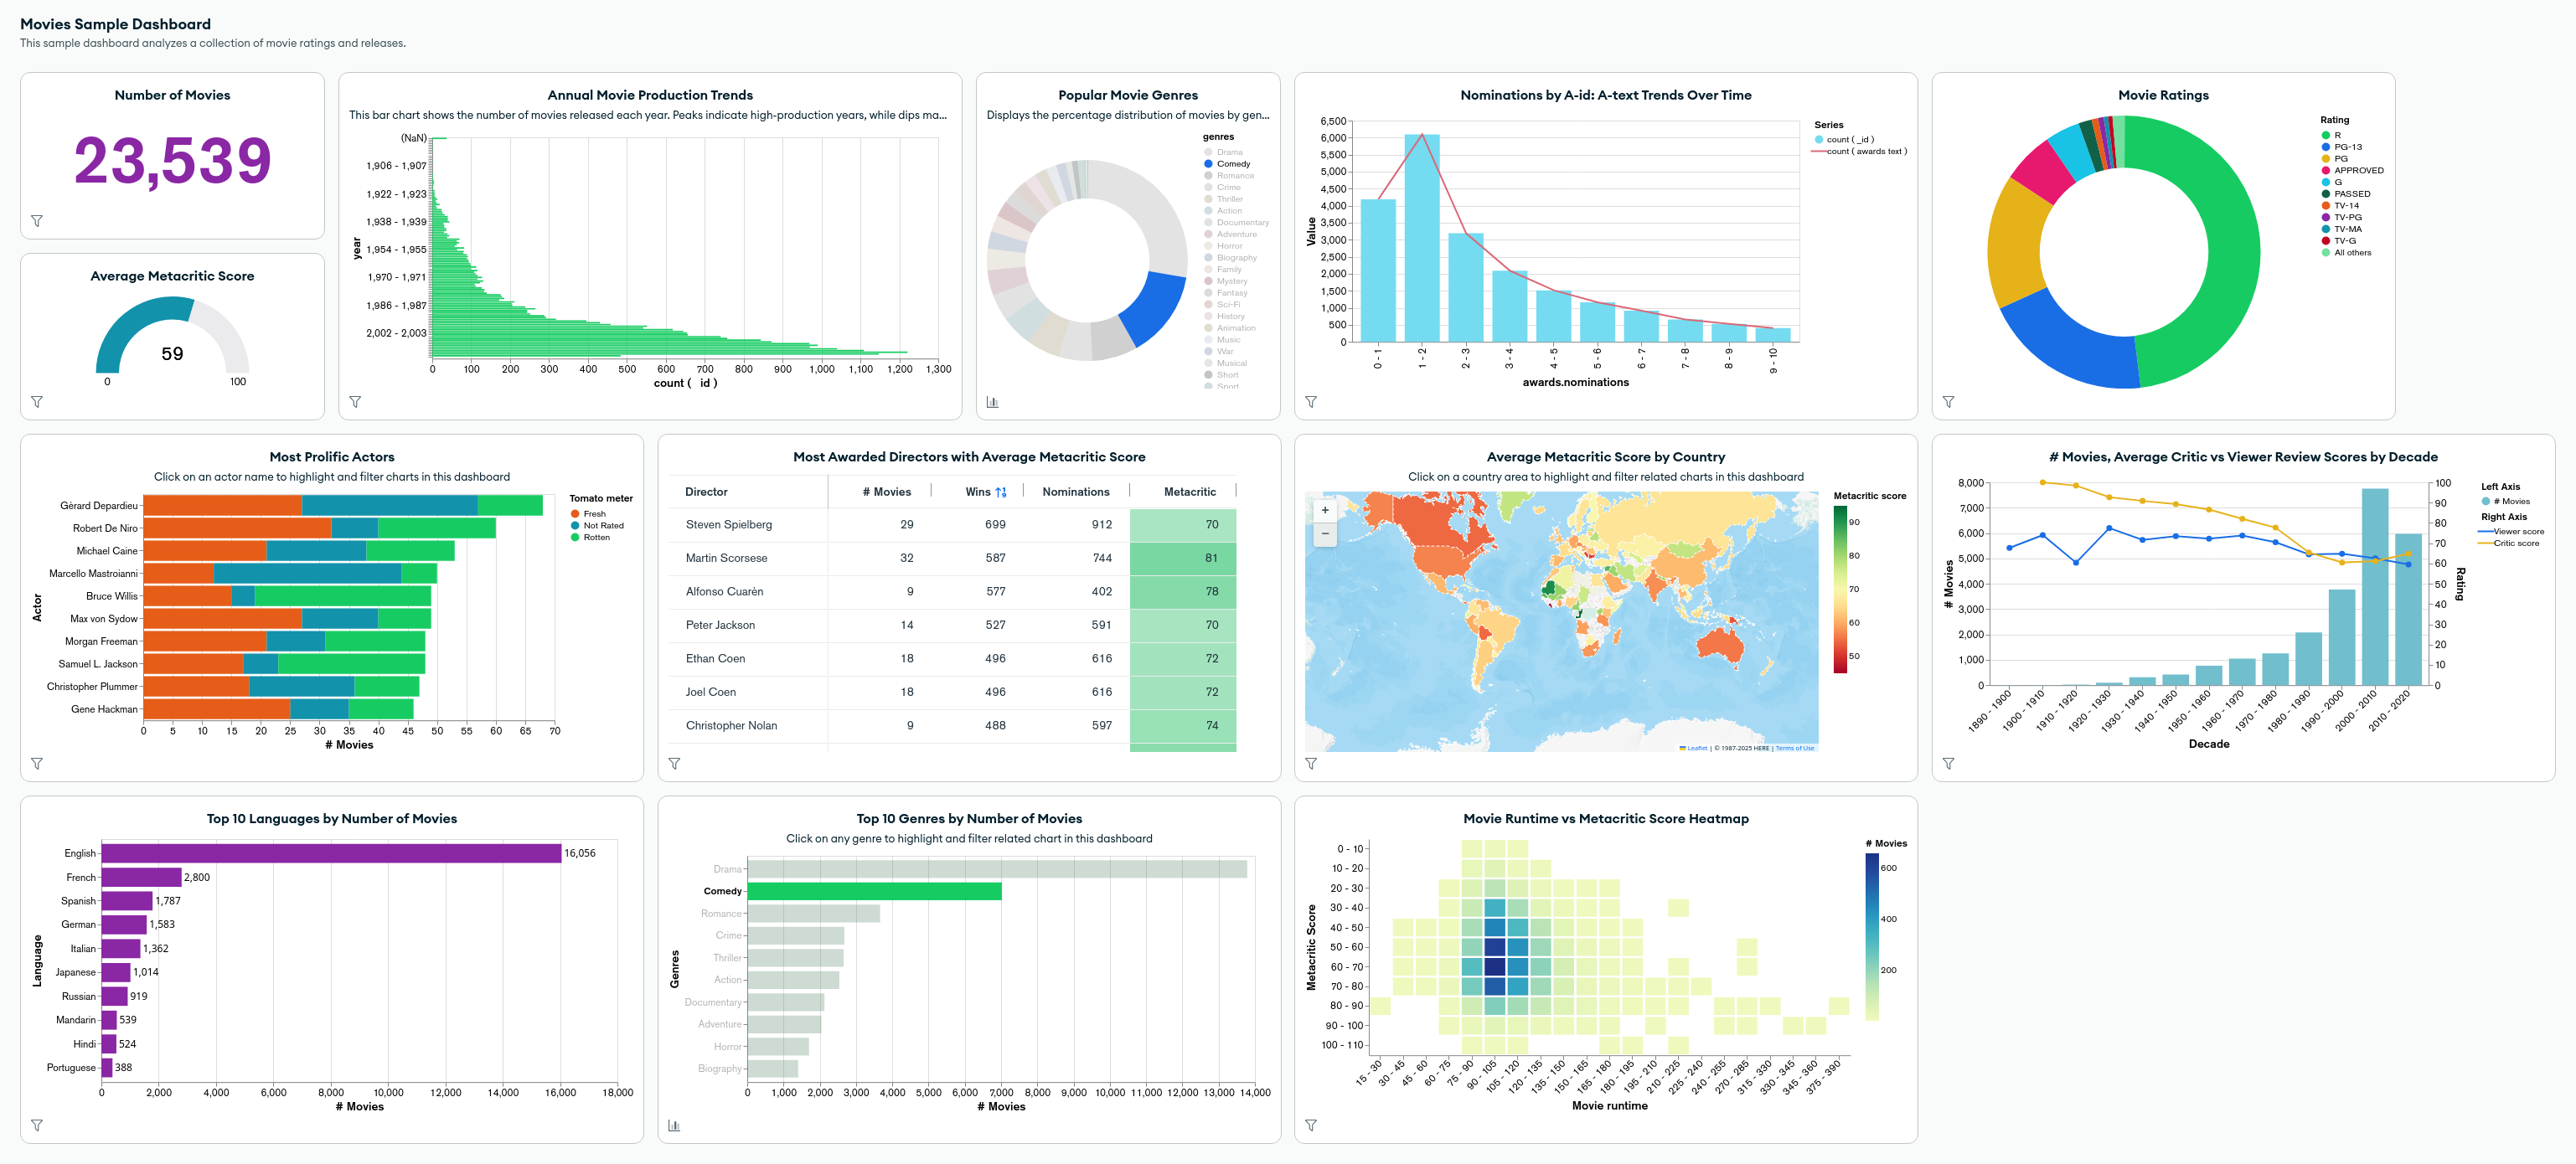

In [31]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Movies Sample Dashboard.png')

## **1. Movie Releases Over Time**

Chart Type: Grouped Bar

X-Axis: year (binned by 1-year intervals)

Y-Axis: COUNT of _id (number of movies)

#Problem Statement:
Analyze historical trends in movie production.

#Managerial Insight:

Identify peak years for movie releases.

Plan marketing campaigns around anniversaries of high-release years.

---


Saving Screenshot 2025-03-16 135958.png to Screenshot 2025-03-16 135958.png


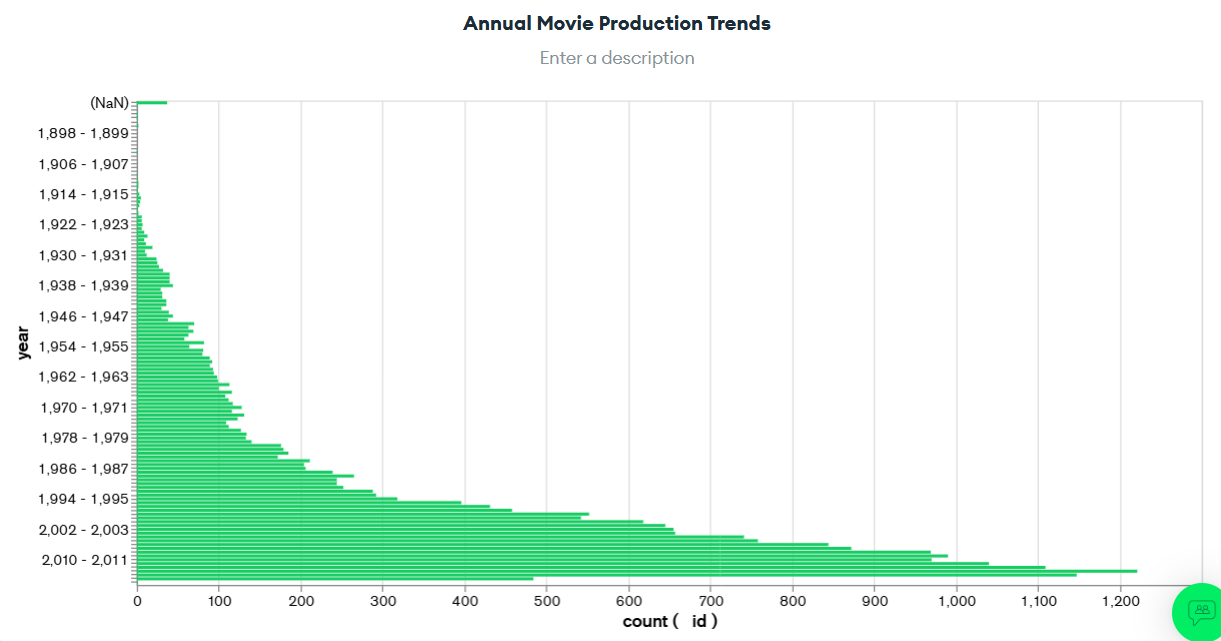

In [23]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 135958.png')

## **2.Nominations by A-id: A-text Trends Over Time**

Chart Type: Grouped Combo Chart

X-Axis: Nomination (binned by nomination categories)

Columns: A_id (grouped by unique identifiers)

Lines: A-text (trend lines for text-based categories)

#Problem Statement:
Analyze how nominations for different A-id categories change over time and compare trends with A-text categories.
#Managerial Insight:

Identify which A-id categories receive consistent nominations to focus marketing efforts.

Use A-text trends to understand shifts in nomination patterns that might indicate changes in audience preferences or industry recognition.

---


Saving Screenshot 2025-03-16 151044.png to Screenshot 2025-03-16 151044.png


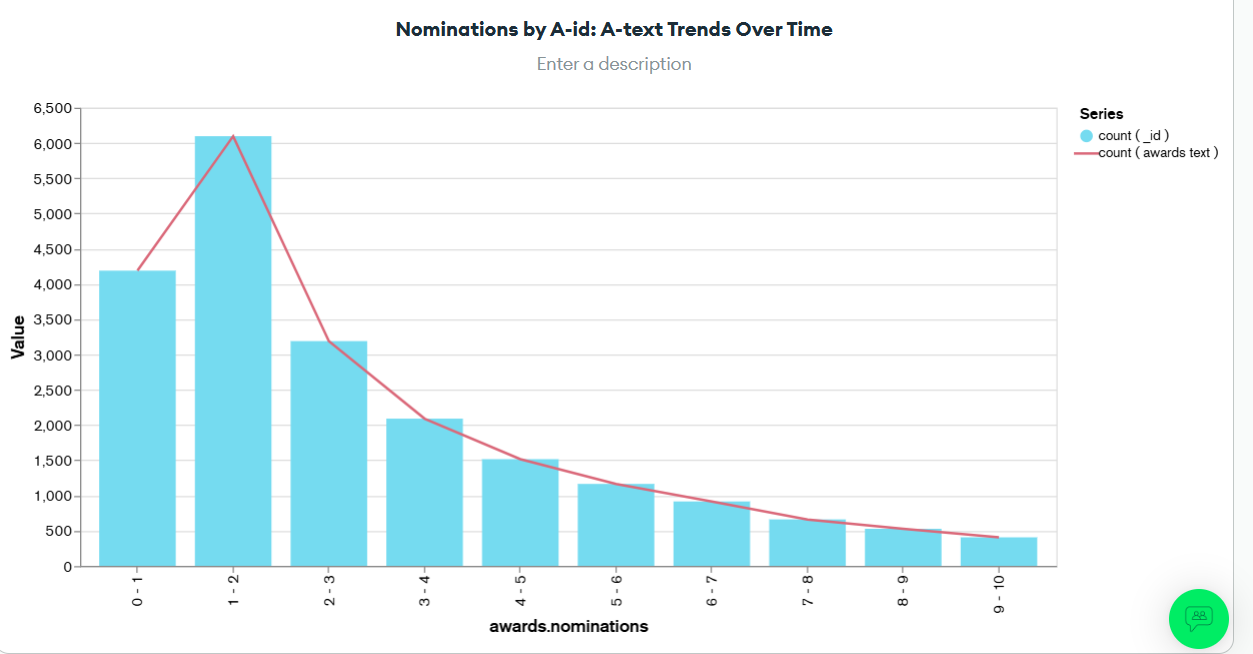

In [30]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 151044.png')

## **3. Popular Movie Genres**
Chart Type:Doughnut Chart

Series: genres

Value: COUNT of _id

#Problem Statement:
Determine which genres dominate the movie industry.

#Managerial Insight:

Focus on producing movies in high-demand genres like Action or Drama.

Explore opportunities in underrepresented genres to capture niche markets.

---


Saving Screenshot 2025-03-16 141427.png to Screenshot 2025-03-16 141427.png


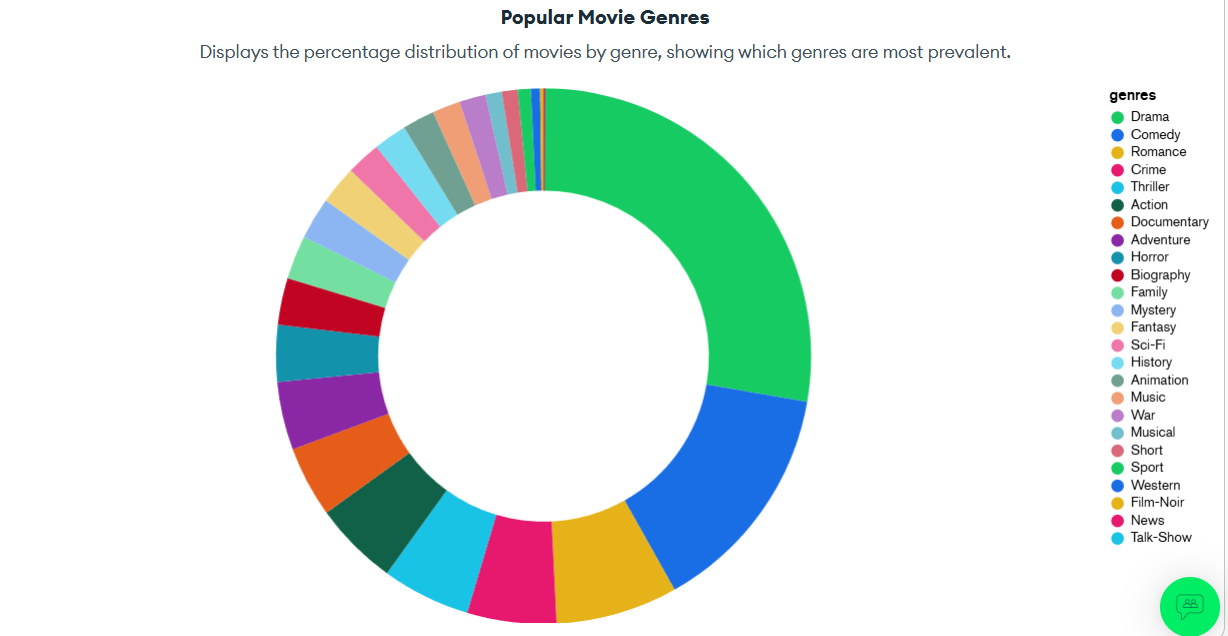

In [24]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 141427.png')

## **4.Movie Ratings Distribution**

Chart Type: Donut Chart

Series: rated (movie ratings)

Value: COUNT of _id (number of movies per rating)

#Problem Statement:
Understand the distribution of movie ratings to identify trends in content classification.

#Managerial Insight:

Focus on producing movies that align with popular or high-demand ratings (e.g., PG-13).

Analyze gaps in underrepresented ratings for niche opportunities.

---


Saving Screenshot 2025-03-16 142254.png to Screenshot 2025-03-16 142254.png


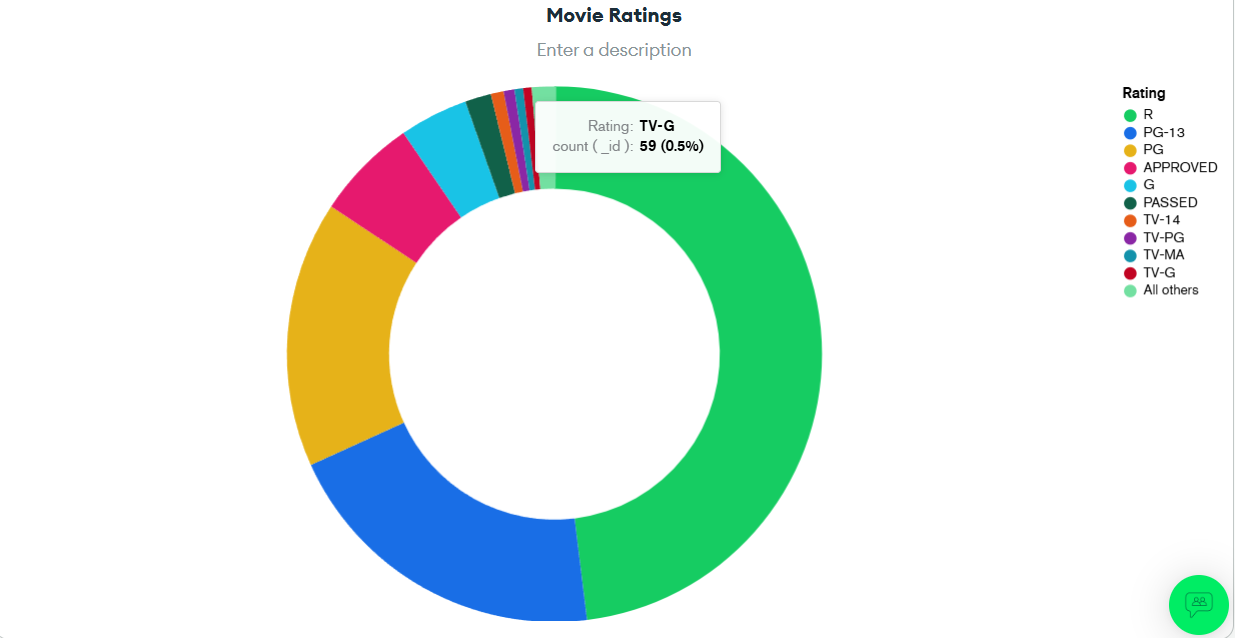

In [25]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 142254.png')

## **5.Top 10 Genres by Number of Movies**

Chart Type: Grouped Bar Chart

X-Axis: genres (top 10 genres)

Y-Axis: COUNT of _id (number of movies per genre)

Series: A-id (e.g., Action, Adventure)

Color/Series (Optional): A-genre (e.g., Action, Adventure)

#Problem Statement:
Identify the most popular genres based on the number of movies produced.

#Managerial Insight:

Focus production on genres with high demand (e.g., Action, Comedy).

Explore opportunities in less popular genres for niche audiences.

---


Saving Screenshot 2025-03-16 142725.png to Screenshot 2025-03-16 142725.png


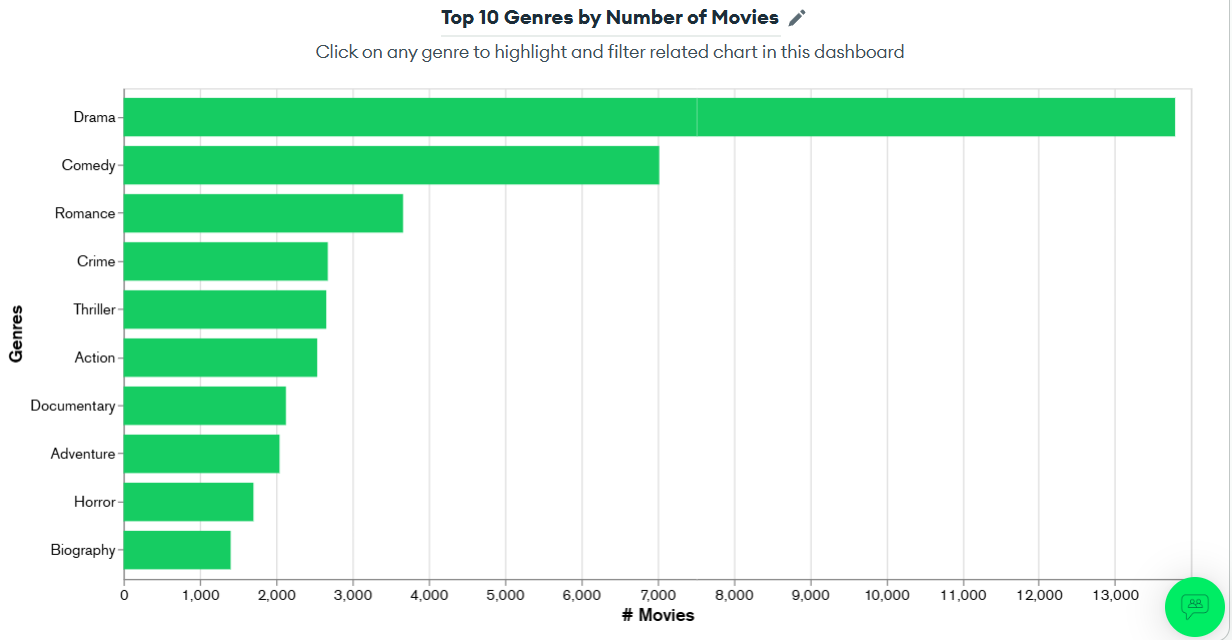

In [26]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 142725.png')

## **6.Most Prolific Actors by Role**

Chart Type: Stacked Bar Chart

X-Axis: cast (actor names)

Y-Axis: COUNT of _id (number of movies)

Stacked Series: A-id (actor ID) and A-cast (actor role/cast type)

#Problem Statement:
Identify actors who have appeared in the most movies and analyze their roles.
#Managerial Insight:

Recognize versatile actors who can play multiple roles effectively.

Consider casting these actors in future projects for their broad appeal.

---


Saving Screenshot 2025-03-16 143203.png to Screenshot 2025-03-16 143203.png


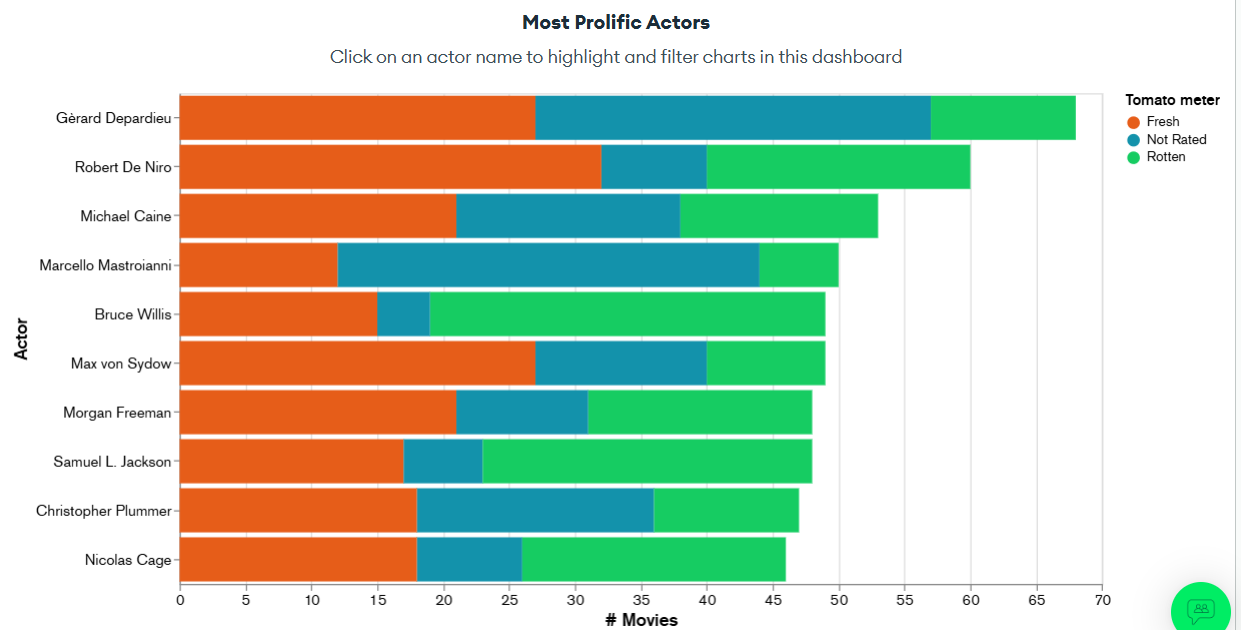

In [27]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 143203.png')

## **7.Decade Comparison of Critic and Viewer Scores**

Chart Type: Grouped Bar Chart

X-Axis: decade (derived from year)

Y-Axis: AVG(critic_score) and AVG(viewer_score)

Series: critic_score and viewer_score

#Problem Statement:
Compare average critic and viewer scores across different decades.
#Managerial Insight:

Identify decades where critic and viewer opinions align or diverge significantly.

Use this information to tailor marketing strategies for new releases.

---


Saving Screenshot 2025-03-16 144000.png to Screenshot 2025-03-16 144000.png


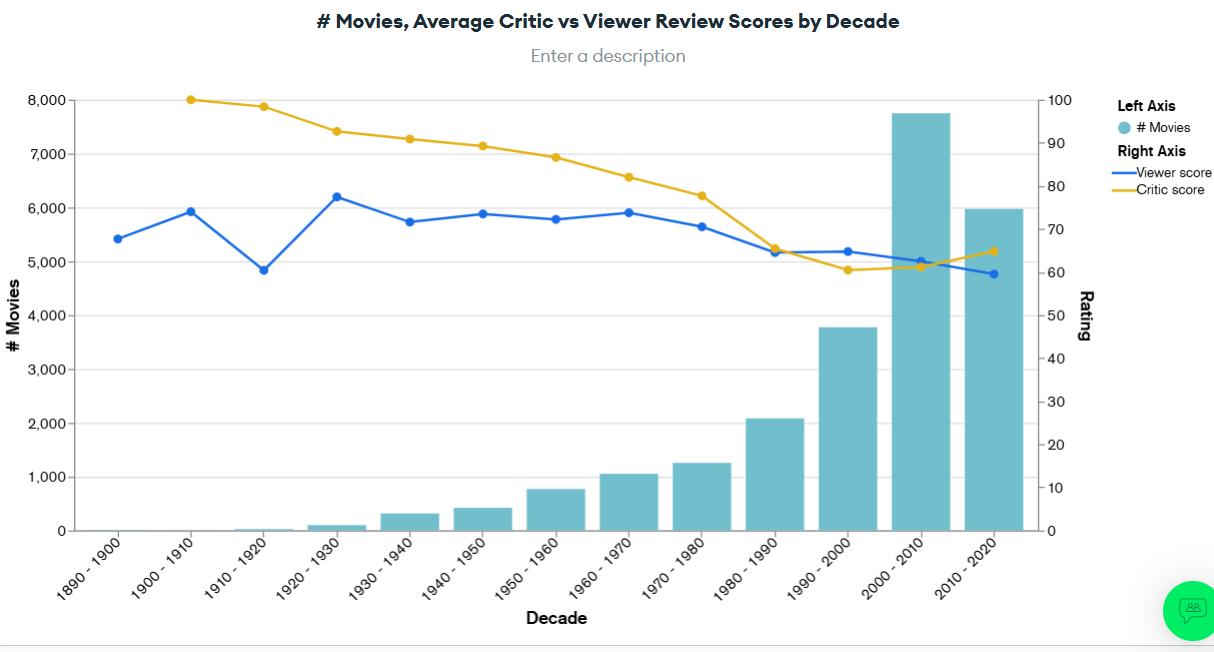

In [28]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 144000.png')

## **8.Top 10 Languages by Number of Movies**


Chart Type: Grouped Bar Chart

X-Axis: A-id (assuming this is a unique identifier or category)

Y-Axis: COUNT of _id (number of movies)

Series: A_Language (language of the movies)

#Problem Statement:
Determine the top languages used in movies across different categories (A-id).
#Managerial Insight:

Identify languages with the most movies to focus on localization efforts.

Understand how language distribution varies across categories (A-id).

---


Saving Screenshot 2025-03-16 144323.png to Screenshot 2025-03-16 144323.png


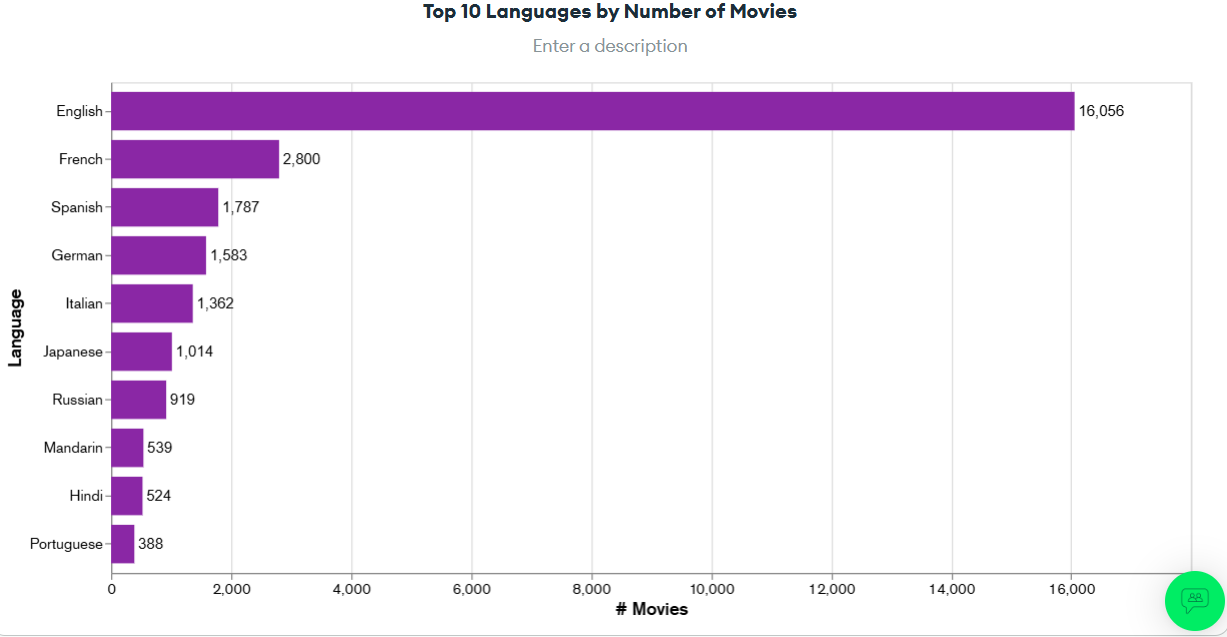

In [29]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image('Screenshot 2025-03-16 144323.png')